# About Dataset

Walmart Inc. es una corporación minorista multinacional estadounidense que opera una cadena de hipermercados (también llamados supercentros), grandes almacenes de descuento y tiendas de comestibles en los Estados Unidos, con sede en Bentonville, Arkansas.

El **archivo** contiene información sobre las ventas semanales de 45 tiendas para el año 2010-2012, incluidos los factores que afectan las ventas, como los días festivos, la temperatura, el precio del combustible, el IPC y el desempleo.

<center><img src="https://www.khmertimeskh.com/wp-content/uploads/2023/01/51193.jpg" width="900" height="500"></center>

## Variables de nuestro Dataset:

- 1- Store: Números de tienda que van del 1 al 45
- 2- Date: Semana de rebajas. Tiene el formato dd-mm-aaaa. La fecha comienza el 05-02-2010.
- 3- Weekly_Sales: Las ventas de la tienda dada en la semana dada
- 4- Holiday_Flag: Si la semana tiene un día festivo especial o no. 1-La semana tiene un día festivo 0-Semana totalmente laboral
- 5- TemperatureAverage: Temperatura de la semana de rebajas
- 6- Fuel_Price: Precio del combustible en la región de la tienda indicada
- 7- Unemployment: **Tasa** de desempleo de la región de la tienda dada
- 8- CPI: Índice de Precios al Consumidor, instrumento para medir la inflación. Se utiliza para estimar la variación media entre dos periodos dados de los precios de los productos consumidos por los hogares. Es una medida compuesta de la evolución de los precios de los productos, a calidad constante.

<center><img src="https://cdn.educba.com/academy/wp-content/uploads/2019/07/Consumer-Price-Index-Formula.jpg" width="900" height="500"></center>

## Cargamos librerias

In [1]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot - Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import klib

# Convertir a un formato de datetime
# ==============================================================================
from datetime import datetime
from datetime import timedelta

In [32]:
# Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from utilsforecast.plotting import plot_series
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from utilsforecast.preprocessing import fill_gaps

# Ocultar advertencia - Warning
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## Cargamos nuestros datos

In [3]:
df = pd.read_csv("./data/walmart-sales-dataset-of-45stores.csv" , sep = "," ,encoding = "utf-8")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Discovery

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


- Converting Date to datetime

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

- Null Values Discovery

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

- Duplicate Values Discovery

In [9]:
df.duplicated().sum()

0

- Outliers Discovery

Store              Axes(0.125,0.712609;0.168478x0.167391)
Weekly_Sales    Axes(0.327174,0.712609;0.168478x0.167391)
Holiday_Flag    Axes(0.529348,0.712609;0.168478x0.167391)
Temperature     Axes(0.731522,0.712609;0.168478x0.167391)
Fuel_Price         Axes(0.125,0.511739;0.168478x0.167391)
CPI             Axes(0.327174,0.511739;0.168478x0.167391)
Unemployment    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

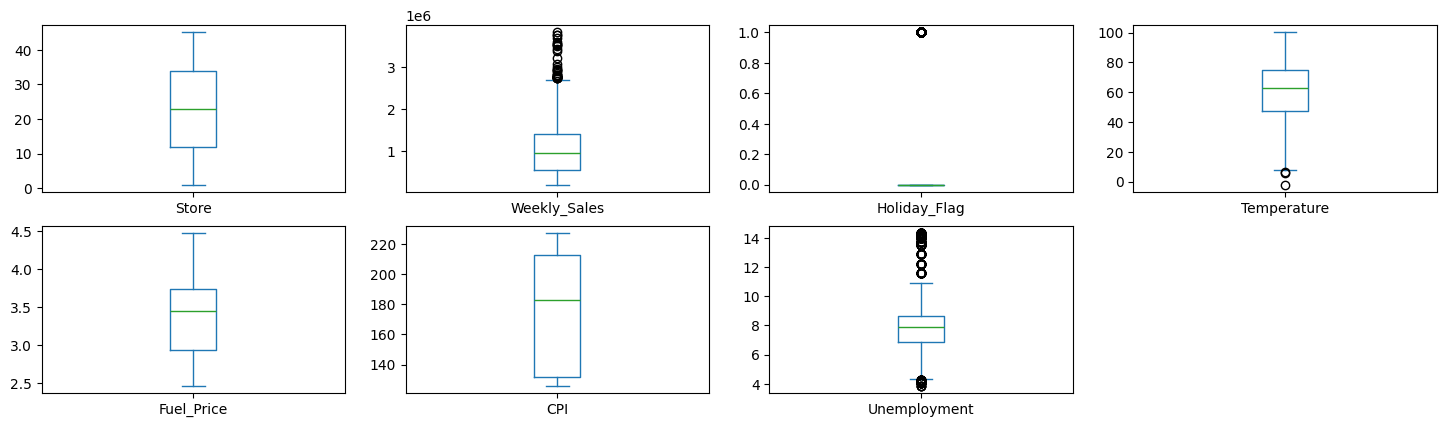

In [10]:
df.plot(kind = "box" , subplots = True , figsize = (18,10) , layout = (4,4))

## Visualization

<Axes: xlabel='Store', ylabel='Density'>

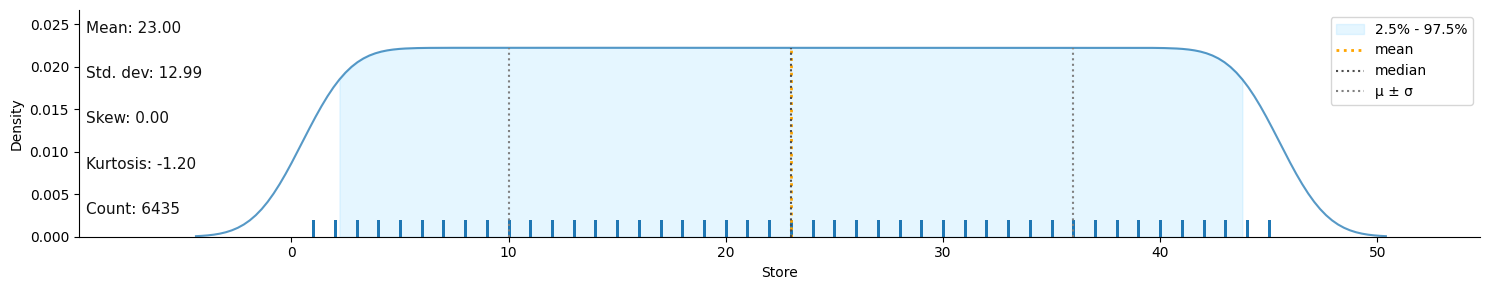

In [11]:
klib.dist_plot(df) 

**Observación:** Las rebajas son más frecuentes cuando son baratas.

<h1 align="left" style="color:; "> <b> <font  color = '#F5CAC3'>Análizando las ventas a lo largo del tiempo</font> </h1>

*Para analizar las tendencias es fundamental tener en cuenta los principales factores que posiblemente afecten el comportamiento de las ventas*

**Eventos festivos de la semana**

    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
    Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12


In [43]:
date_sales = df.groupby("Date")[["Weekly_Sales"]].sum().reset_index()
date_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


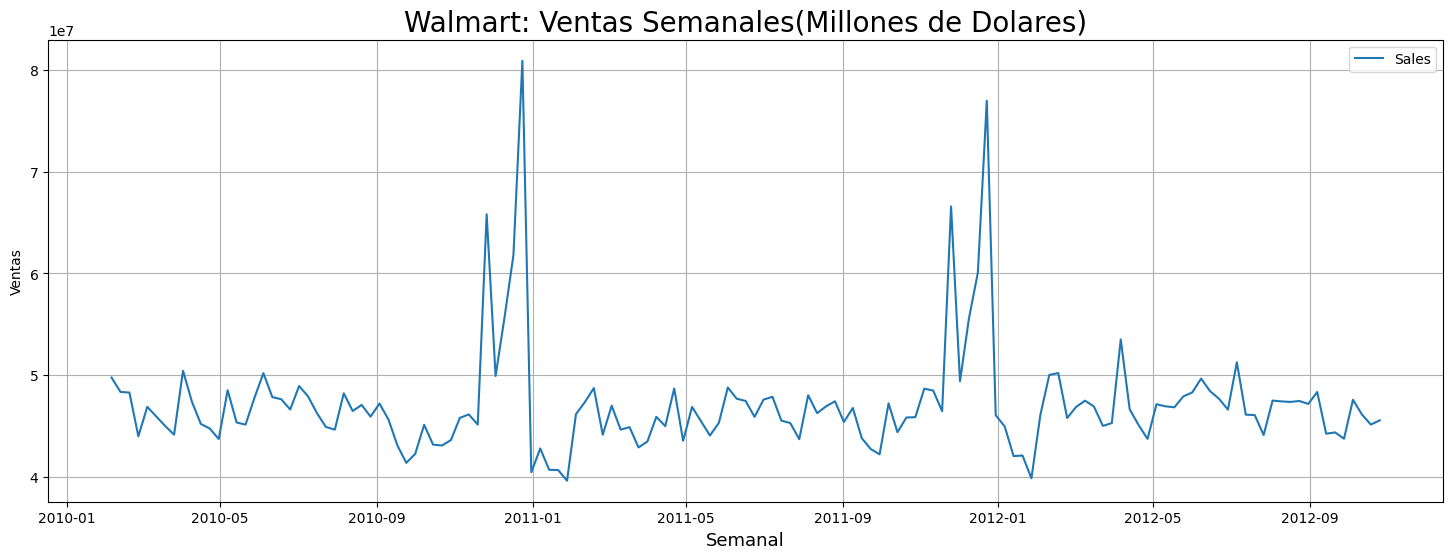

In [22]:
plt.figure(figsize=(18,6))
plt.plot(date_sales['Date'],date_sales['Weekly_Sales'], label = "Sales")
plt.title("Walmart: Ventas Semanales(Millones de Dolares)", fontsize = 20)
plt.xlabel("Semanal", fontsize = 13)
plt.ylabel("Ventas")
plt.legend()
plt.grid()
plt.show()

**Observación**: Las ventas son estacionarias en la media, pero no estacionarias en la varianza. Además, cada año, alrededor de enero, las ventas muestran un gran aumento (cambio estacional) debido a la Navidad y el Día de Acción de Gracias.

<h1 align="left" style="color:; "> <b> <font  color = '#F5CAC3'>Correlaciones entre otras variables y las ventas a lo largo del tiempo</font> </h1>

In [23]:
df['Temperature'].unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

In [24]:
for date, group_df in df.groupby(['Date']):
    print(f"Date: {date}")
    print(group_df[['Date','Temperature']])

Date: 2010-02-05 00:00:00
           Date  Temperature
0    2010-02-05        42.31
143  2010-02-05        40.19
286  2010-02-05        45.71
429  2010-02-05        43.76
572  2010-02-05        39.70
715  2010-02-05        40.43
858  2010-02-05        10.53
1001 2010-02-05        34.14
1144 2010-02-05        38.01
1287 2010-02-05        54.34
1430 2010-02-05        46.04
1573 2010-02-05        49.47
1716 2010-02-05        31.53
1859 2010-02-05        27.31
2002 2010-02-05        19.83
2145 2010-02-05        19.79
2288 2010-02-05        23.11
2431 2010-02-05        21.33
2574 2010-02-05        20.96
2717 2010-02-05        25.92
2860 2010-02-05        39.05
3003 2010-02-05        24.36
3146 2010-02-05        15.25
3289 2010-02-05        22.43
3432 2010-02-05        21.10
3575 2010-02-05         9.55
3718 2010-02-05        27.19
3861 2010-02-05        49.47
4004 2010-02-05        24.36
4147 2010-02-05        39.05
4290 2010-02-05        39.05
4433 2010-02-05        34.43
4576 2010-02-05  

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_70601/962531197.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for date, group_df in df.groupby(['Date']):


**Suposición**: Dado que todas las tiendas están en Estados Unidos, no debería haber valores atípicos (cambios elevados entre los valores de temperatura o los precios del combustible), por lo que para medir la correlación entre cada una de estas variables en las ventas, utilizaremos la media de las 45 tiendas en cada fecha.

In [25]:
temp_mean= df.groupby('Date')['Temperature'].mean().reset_index()
temp_mean

,Date,Temperature
0,2010-02-05,34.037333
1,2010-02-12,34.151333
2,2010-02-19,37.719778
3,2010-02-26,39.243556
4,2010-03-05,42.917333
...,...,...
138,2012-09-28,68.754444
139,2012-10-05,65.973111
140,2012-10-12,58.342667
141,2012-10-19,60.705333


In [44]:

date_sales= pd.merge(temp_mean, date_sales, on='Date', how='inner')
date_sales

,Date,Temperature,Weekly_Sales
0,2010-02-05,34.037333,49750740.50
1,2010-02-12,34.151333,48336677.63
2,2010-02-19,37.719778,48276993.78
3,2010-02-26,39.243556,43968571.13
4,2010-03-05,42.917333,46871470.30
...,...,...,...
138,2012-09-28,68.754444,43734899.40
139,2012-10-05,65.973111,47566639.31
140,2012-10-12,58.342667,46128514.25
141,2012-10-19,60.705333,45122410.57


In [33]:
date_sales.corr()

,Temperature,Weekly_Sales
Temperature,1.00000,-0.15916
Weekly_Sales,-0.15916,1.00000


La matriz de correlación entre la temperatura y las ventas semanales:

1. **Correlación de la Temperatura consigo misma**:
   - El valor es **1.00000**, lo cual es esperado ya que cualquier variable tiene una correlación perfecta consigo misma.

2. **Correlación entre la Temperatura y las Ventas Semanales**:
   - El valor es **-0.15916**, lo que indica una **correlación negativa débil** entre la temperatura y las ventas semanales. Esto sugiere que, en general, a medida que la temperatura aumenta, las ventas semanales tienden a disminuir ligeramente, aunque la relación no es muy fuerte.

3. **Correlación de las Ventas Semanales consigo mismas**:
   - Al igual que con la temperatura, la correlación de las ventas semanales consigo mismas es **1.00000**, lo cual es esperado.

### Interpretación:
- **Correlación negativa débil**: La correlación negativa débil entre la temperatura y las ventas semanales podría indicar que ciertos productos se venden menos en temperaturas más altas. Sin embargo, debido a que la correlación es débil, otros factores también podrían estar influyendo en las ventas semanales.

### Siguientes pasos:
- **Análisis adicional**: Sería útil realizar un análisis más profundo para identificar otros factores que podrían estar afectando las ventas semanales.
- **Visualización de datos**: Crear gráficos como scatter plots o gráficos de líneas podría ayudar a visualizar mejor la relación entre la temperatura y las ventas semanales.

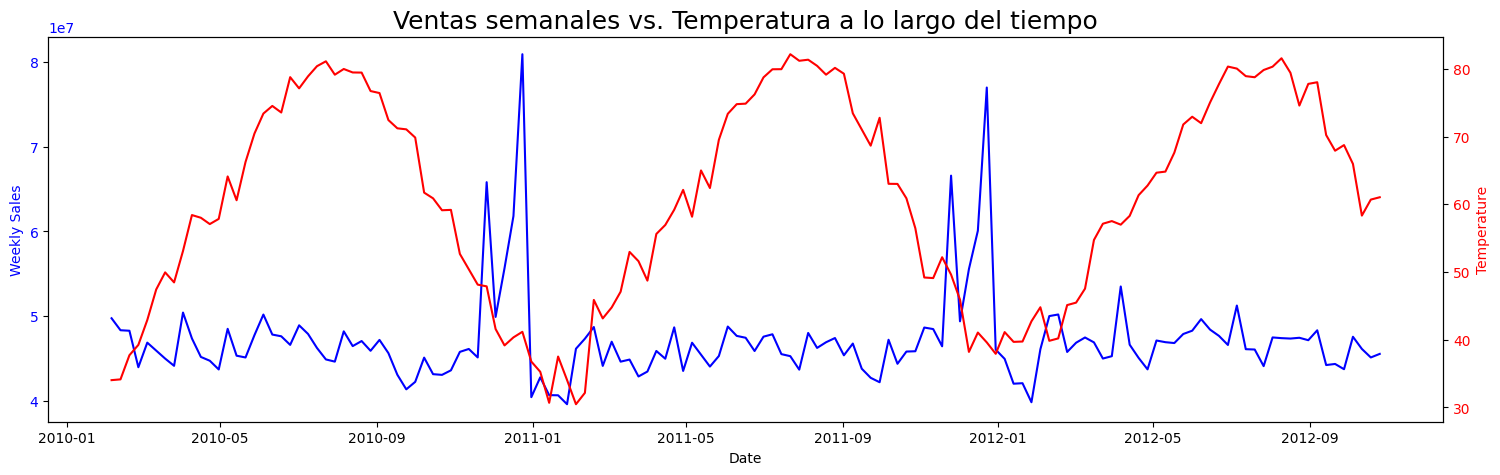

In [29]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Temperature'], color='r', label='Temperature')
ax2.set_ylabel('Temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Ventas semanales vs. Temperatura a lo largo del tiempo', fontdict={'fontsize':18})
plt.show();

**Observación**: Como el aumento de temperatura en verano las ventas no son tan altas como en invierno, lo que indica que la gente sale con menos frecuencia en verano debido a las altas temperaturas.

## Días Festivos

In [34]:
df[df['Holiday_Flag']==0]['Date'].value_counts()

2010-02-05    45
2011-10-28    45
2012-02-24    45
2012-02-17    45
2012-02-03    45
              ..
2010-11-19    45
2010-11-12    45
2010-11-05    45
2010-10-29    45
2012-10-26    45
Name: Date, Length: 133, dtype: int64

In [35]:
df[df['Holiday_Flag']== 1]['Date'].value_counts()

2010-02-12    45
2010-09-10    45
2010-11-26    45
2010-12-31    45
2011-02-11    45
2011-09-09    45
2011-11-25    45
2011-12-30    45
2012-02-10    45
2012-09-07    45
Name: Date, dtype: int64

**Observación**: Dado que los días festivos se consideran feriados nacionales, no dependen del estado, sino del país, por lo tanto, para todas las tiendas en todos los estados, los días festivos son los mismos para la misma fecha.

In [36]:
holiday_flag= df.groupby('Date')['Holiday_Flag'].mean().reset_index()
holiday_flag

,Date,Holiday_Flag
0,2010-02-05,0.0
1,2010-02-12,1.0
2,2010-02-19,0.0
3,2010-02-26,0.0
4,2010-03-05,0.0
...,...,...
138,2012-09-28,0.0
139,2012-10-05,0.0
140,2012-10-12,0.0
141,2012-10-19,0.0


In [45]:
date_sales= pd.merge(holiday_flag, date_sales, on='Date', how='inner')
date_sales

,Date,Holiday_Flag,Temperature,Weekly_Sales
0,2010-02-05,0.0,34.037333,49750740.50
1,2010-02-12,1.0,34.151333,48336677.63
2,2010-02-19,0.0,37.719778,48276993.78
3,2010-02-26,0.0,39.243556,43968571.13
4,2010-03-05,0.0,42.917333,46871470.30
...,...,...,...,...
138,2012-09-28,0.0,68.754444,43734899.40
139,2012-10-05,0.0,65.973111,47566639.31
140,2012-10-12,0.0,58.342667,46128514.25
141,2012-10-19,0.0,60.705333,45122410.57


In [39]:
date_sales.corr()

,Holiday_Flag,Temperature,Weekly_Sales
Holiday_Flag,1.000000,-0.189186,0.172683
Temperature,-0.189186,1.000000,-0.159160
Weekly_Sales,0.172683,-0.159160,1.000000


La tabla que has proporcionado muestra una matriz de correlación entre tres variables: **Holiday_Flag** (indicador de si es un día festivo), **Temperature** (temperatura) y **Weekly_Sales** (ventas semanales). Aquí tienes un análisis de los datos:

1. **Correlación de Holiday_Flag consigo mismo**:
   - El valor es **1.000000**, lo cual es esperado ya que cualquier variable tiene una correlación perfecta consigo misma.

2. **Correlación entre Holiday_Flag y Temperature**:
   - El valor es **-0.189186**, lo que indica una **correlación negativa débil** entre el indicador de días festivos y la temperatura. Esto sugiere que, en general, los días festivos tienden a tener temperaturas ligeramente más bajas, aunque la relación no es muy fuerte.

3. **Correlación entre Holiday_Flag y Weekly_Sales**:
   - El valor es **0.172683**, lo que indica una **correlación positiva débil** entre el indicador de días festivos y las ventas semanales. Esto sugiere que las ventas tienden a ser un poco más altas durante los días festivos, aunque la relación no es muy fuerte.

4. **Correlación entre Temperature y Weekly_Sales**:
   - El valor es **-0.159160**, lo que indica una **correlación negativa débil** entre la temperatura y las ventas semanales. Esto sugiere que, en general, a medida que la temperatura aumenta, las ventas semanales tienden a disminuir ligeramente, aunque la relación no es muy fuerte.

### Interpretación:
- **Correlación negativa débil** entre **Holiday_Flag** y **Temperature**: Los días festivos tienden a tener temperaturas ligeramente más bajas.
- **Correlación positiva débil** entre **Holiday_Flag** y **Weekly_Sales**: Las ventas semanales tienden a ser un poco más altas durante los días festivos.
- **Correlación negativa débil** entre **Temperature** y **Weekly_Sales**: Las ventas semanales tienden a disminuir ligeramente a medida que aumenta la temperatura.

### Siguientes pasos:
- **Análisis adicional**: Sería útil realizar un análisis más profundo para identificar otros factores que podrían estar afectando las ventas semanales.
- **Visualización de datos**: Crear gráficos como scatter plots o gráficos de líneas podría ayudar a visualizar mejor la relación entre estas variables.


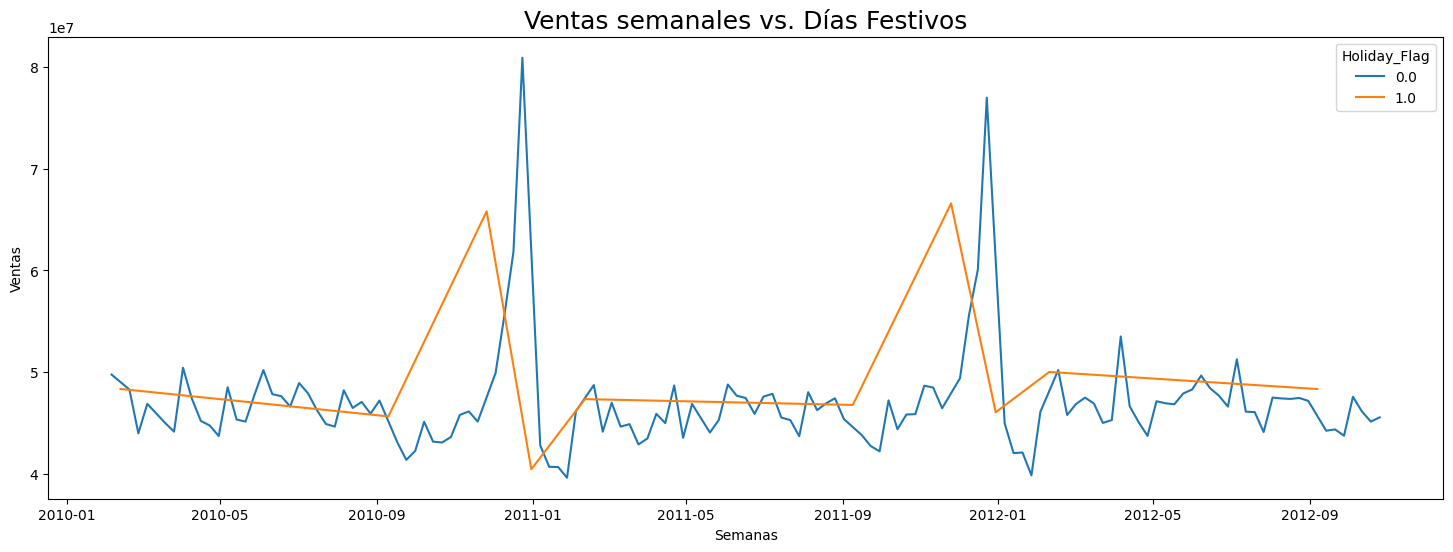

In [60]:
plt.figure(figsize=(18,6))

sns.lineplot(x=date_sales['Date'], y=date_sales['Weekly_Sales'], hue=date_sales['Holiday_Flag'], color = "red")
plt.title('Ventas semanales vs. Días Festivos', fontdict={'fontsize':18})
plt.xlabel("Semanas")
plt.ylabel("Ventas")
plt.show()

**Observación**: las ventas muestran mayores incrementos (picos) durante las vacaciones.

## Precio del combustible

In [61]:
df.groupby(['Date'])['Fuel_Price'].var().sort_values(ascending=False).reset_index()

,Date,Fuel_Price
0,2012-10-12,0.092171
1,2012-10-19,0.087517
2,2012-10-26,0.078129
3,2012-03-02,0.068691
4,2012-02-24,0.065857
...,...,...
138,2010-03-26,0.012360
139,2010-06-04,0.012174
140,2010-04-16,0.012087
141,2010-04-09,0.010934


**Observación**: Los valores de variación para cada tienda son muy bajos, lo que indica que todas las tiendas tienen casi los mismos precios de combustible.

In [62]:
Fuel_price= df.groupby('Date')['Fuel_Price'].mean().reset_index()
Fuel_price

,Date,Fuel_Price
0,2010-02-05,2.717844
1,2010-02-12,2.694022
2,2010-02-19,2.672067
3,2010-02-26,2.683933
4,2010-03-05,2.731200
...,...,...
138,2012-09-28,3.854578
139,2012-10-05,3.845222
140,2012-10-12,3.896733
141,2012-10-19,3.880000


In [63]:
date_sales= pd.merge(Fuel_price, date_sales, on='Date', how='inner')
date_sales

,Date,Fuel_Price,Holiday_Flag,Temperature,Weekly_Sales
0,2010-02-05,2.717844,0.0,34.037333,49750740.50
1,2010-02-12,2.694022,1.0,34.151333,48336677.63
2,2010-02-19,2.672067,0.0,37.719778,48276993.78
3,2010-02-26,2.683933,0.0,39.243556,43968571.13
4,2010-03-05,2.731200,0.0,42.917333,46871470.30
...,...,...,...,...,...
138,2012-09-28,3.854578,0.0,68.754444,43734899.40
139,2012-10-05,3.845222,0.0,65.973111,47566639.31
140,2012-10-12,3.896733,0.0,58.342667,46128514.25
141,2012-10-19,3.880000,0.0,60.705333,45122410.57


In [66]:
date_sales.corr()

,Fuel_Price,Holiday_Flag,Temperature,Weekly_Sales
Fuel_Price,1.000000,-0.084039,0.205757,-0.056722
Holiday_Flag,-0.084039,1.000000,-0.189186,0.172683
Temperature,0.205757,-0.189186,1.000000,-0.159160
Weekly_Sales,-0.056722,0.172683,-0.159160,1.000000


Text(0.5, 1.0, 'Ventas semanales vs. precio del combustible a lo largo del tiempo')

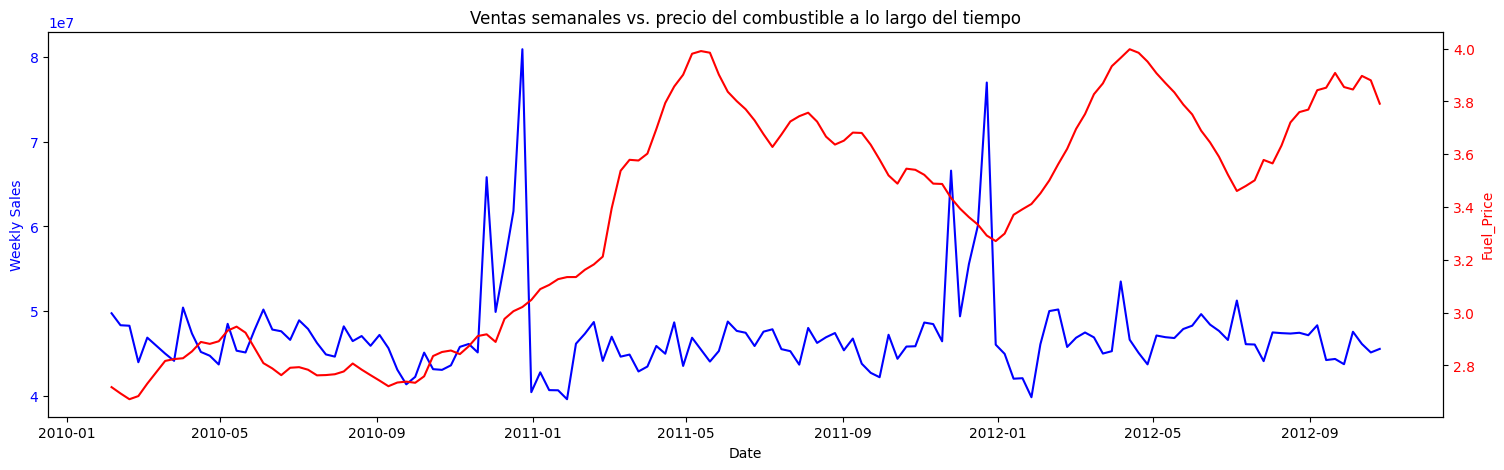

In [65]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Fuel_Price'], color='r', label='Fuel_Price')
ax2.set_ylabel('Fuel_Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Ventas semanales vs. precio del combustible a lo largo del tiempo')

**Observación**: Los precios del combustible parecen aumentar con el tiempo debido a la inflación, pero no tiene nada que ver con las ventas, es decir: no tiene correlación con las ventas.

<h1 align="left" style="color:Blue; "> <b> <font  color= '#F5CAC3'>Correlación entre características </font> </h1>

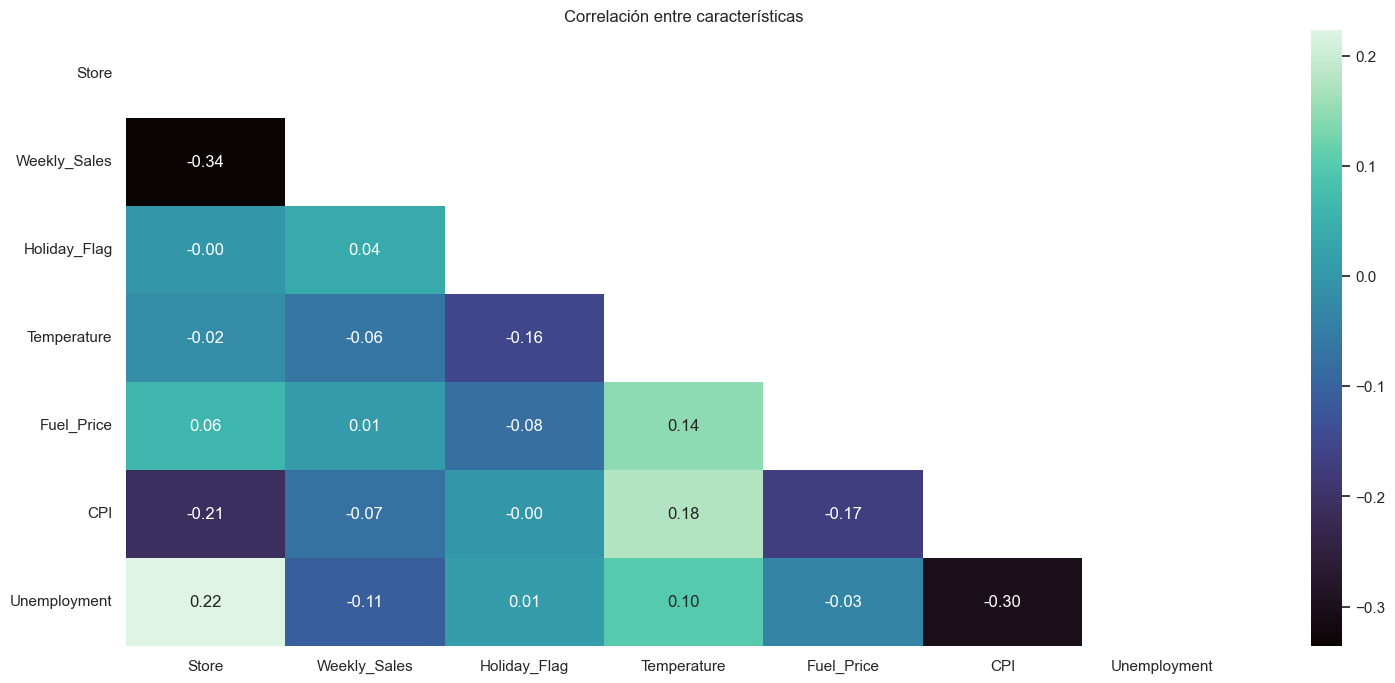

In [68]:
plt.figure(figsize=(18, 8))
sns.set(style="white") 

mask = np.triu(df.corr()) 
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap='mako', mask=mask)
plt.title("Correlación entre características")
plt.show()

<h1 align="left" style="color:Blue; "> <b> <font  color= '#F5CAC3'>¿Qué tienda tiene la máxima desviación estándar, es decir, las ventas varían mucho? </font> </h1>

In [69]:
df.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending=False).reset_index()

,Store,Weekly_Sales
0,14,317569.949476
1,10,302262.062504
2,20,275900.562742
3,4,266201.442297
4,13,265506.995776
5,23,249788.038068
6,27,239930.135688
7,2,237683.694682
8,39,217466.454833
9,6,212525.855862


**Observación**: La tienda 14 tiene la desviación estándar más alta, lo que indica que sus ventas semanales varían significativamente de una semana a otra. Mientras que la tienda 37 tiene la desviación estándar más baja, lo que sugiere que sus ventas semanales se mantienen relativamente estables y constantes.

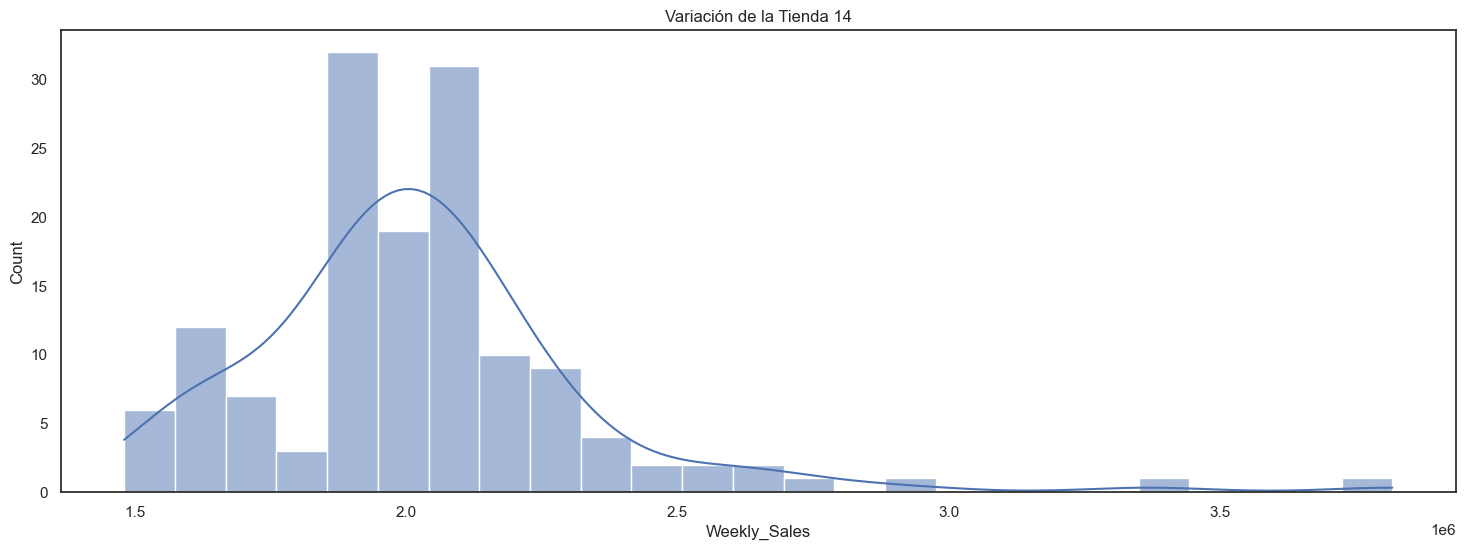

In [72]:
plt.figure(figsize=(18,6)) 
sns.histplot(df[df['Store'] == 14]['Weekly_Sales'],  kde= True)
plt.title("Variación de la Tienda 14")
plt.show()

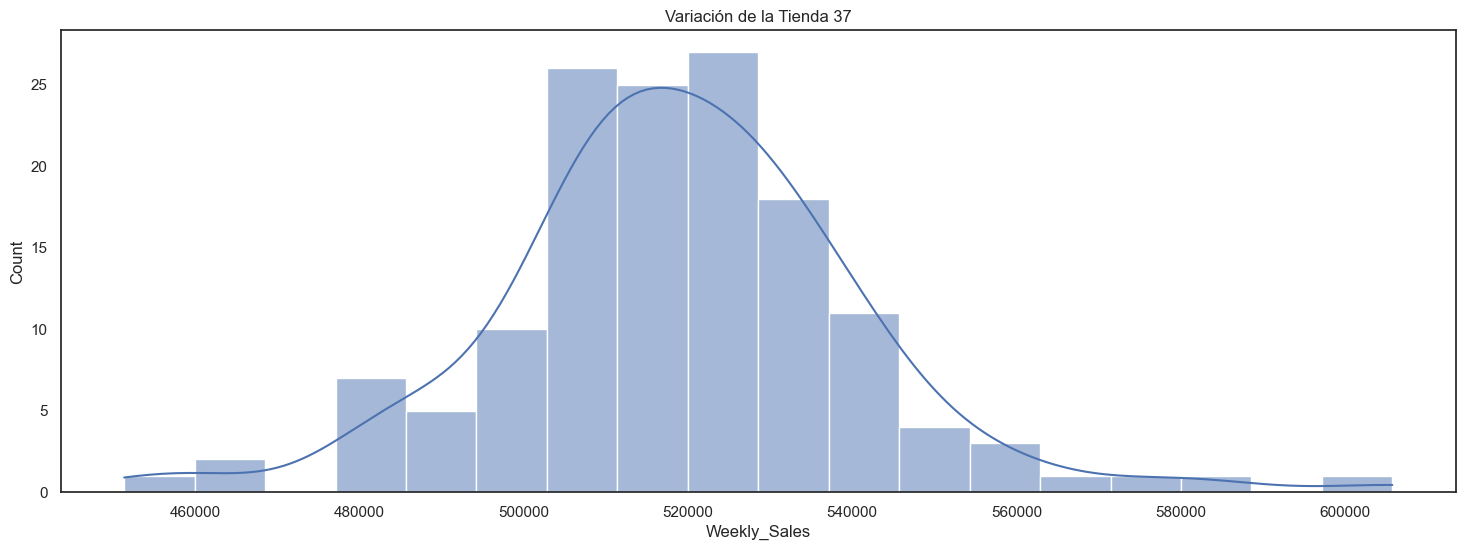

In [74]:
plt.figure(figsize=(18,6)) 
sns.histplot(df[df['Store'] == 37]['Weekly_Sales'], kde= True)
plt.title("Variación de la Tienda 37")
plt.show()

<h1 align="left" style="color:Blue; "> <b> <font  color = '#F5CAC3'>¿Qué días festivos tienen mayores ventas que la media de ventas en temporada no festiva para todas las tiendas juntas? </font> </h1>

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12


In [75]:
non_holiday_mean_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
non_holiday_mean_sales

1041256.3802088555

In [76]:
super_bowl=df[(df['Date'] == '02-12-2010') | (df['Date'] == '02-12-2011') | (df['Date'] == '02-12-2012')]['Weekly_Sales'].mean()
super_bowl

1074148.3917777783

In [77]:
Labour_day= df[(df['Date'] == '09-10-2010') | (df['Date'] == '09-10-2011') | (df['Date'] == '09-10-2012')]['Weekly_Sales'].mean()
Labour_day

1014097.7297777778

In [78]:
Thanksgiving= df[(df['Date'] == '11-26-2010') | (df['Date'] == '11-26-2011') | (df['Date'] == '11-26-2012')]['Weekly_Sales'].mean()
Thanksgiving

1462688.960888889

In [79]:
Christmas= df[(df['Date'] == '12-31-2010') | (df['Date'] == '12-31-2011') | (df['Date'] == '12-31-2012')]['Weekly_Sales'].mean()
Christmas

898500.4222222222

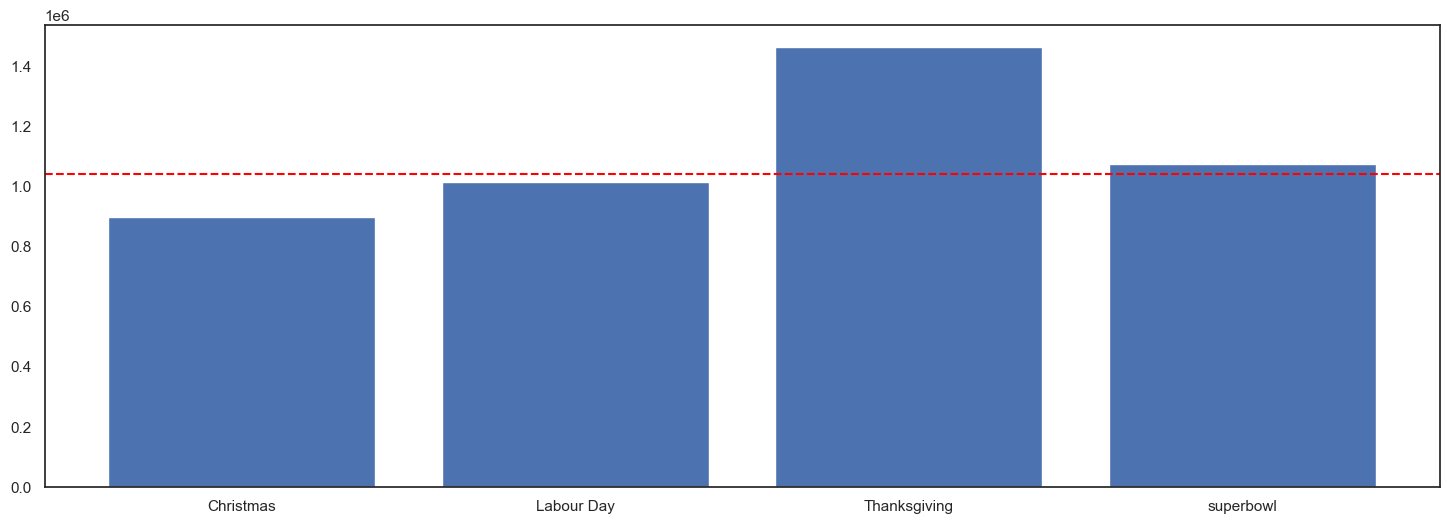

In [80]:
plt.figure(figsize=(18,6))  
holidays = ['Christmas', 'Labour Day', 'Thanksgiving', 'superbowl']
mean_values = [Christmas,Labour_day,Thanksgiving,super_bowl]  # Replace these with your actual counts

plt.bar(holidays, mean_values)
plt.axhline(non_holiday_mean_sales, color='red', linestyle='--', label='Mean')

**Observación**: El Día de Acción de Gracias y el Super Bowl tienen las ventas más altas que la media de ventas en días no festivos.

<h1 align="left" style="color:Blue; "> <b> <font  color = '#F5CAC3'>Ventas en diferentes meses </font> </h1>

In [81]:
month_sales= df.groupby('Date')[['Weekly_Sales']].sum()
month_sales

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


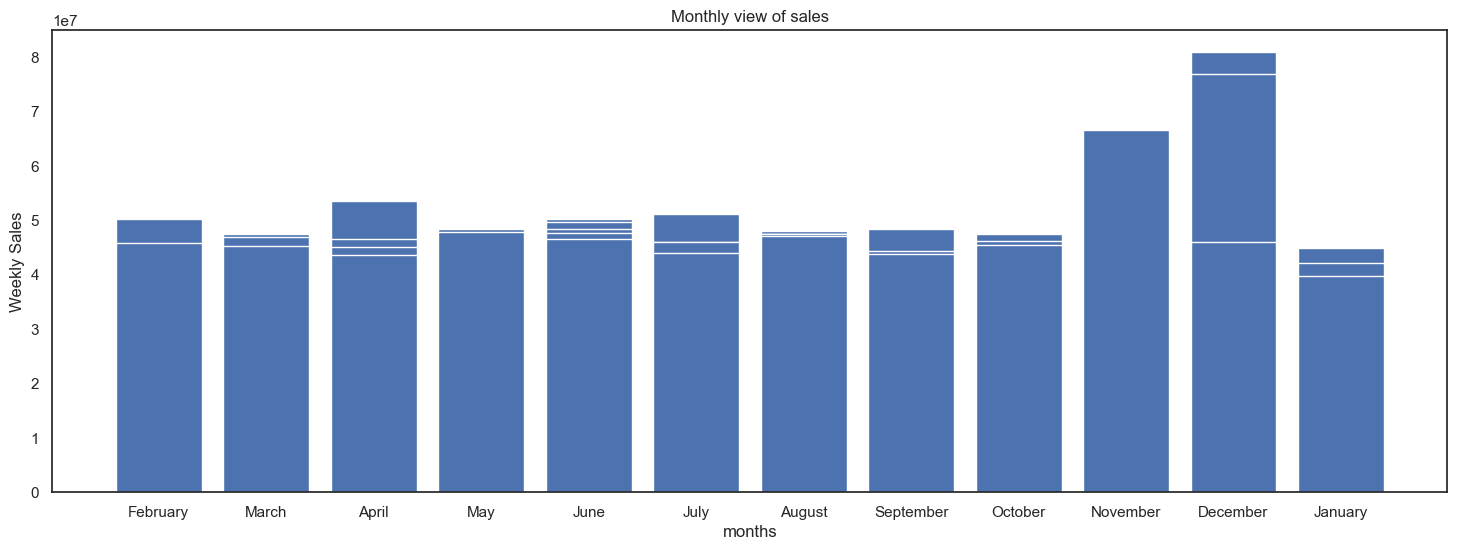

In [83]:
plt.figure(figsize=(18,6))
plt.bar(month_sales.index.month_name(),month_sales["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

**Observación**: Diciembre registra las mayores ventas de todos los meses

<h1 align="left" style="color:Blue; "> <b> <font  color = '#F5CAC3'>Análisis a nivel de tienda</font> </h1>

- La tienda con mayores ventas significa:

In [85]:
df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).reset_index()

,Store,Weekly_Sales
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06


**Observación**: la tienda 20 tiene la media de ventas más alta

- La tienda con mayor suma de ventas:

In [86]:
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending= False).reset_index()

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


**Observación**: la tienda 20 tiene la mayor suma de ventas

- La tienda con el máximo de ventas más alto:

In [87]:
df.groupby('Store')['Weekly_Sales'].max().sort_values(ascending= False).reset_index()

,Store,Weekly_Sales
0,14,3818686.45
1,20,3766687.43
2,10,3749057.69
3,4,3676388.98
4,13,3595903.20
5,2,3436007.68
6,27,3078162.08
7,23,2734277.10
8,6,2727575.18
9,19,2678206.42


**Observación**: la tienda 14 tiene el máximo de ventas más alto

In [88]:
df[df['Store']==1].describe()['Weekly_Sales'].reset_index()

,index,Weekly_Sales
0,count,1.430000e+02
1,mean,1.555264e+06
2,std,1.559808e+05
3,min,1.316899e+06
4,25%,1.458105e+06
5,50%,1.534850e+06
6,75%,1.614892e+06
7,max,2.387950e+06


In [89]:
df[df['Store']==20].describe()['Weekly_Sales'].reset_index()

,index,Weekly_Sales
0,count,1.430000e+02
1,mean,2.107677e+06
2,std,2.759006e+05
3,min,1.761017e+06
4,25%,1.950866e+06
5,50%,2.053165e+06
6,75%,2.155186e+06
7,max,3.766687e+06


**Observación**: la tienda número 20 es la que tiene el mejor rendimiento, por lo que la representaremos gráficamente para ver su comportamiento en el tiempo.

In [90]:
store_sales_20= df[df['Store']==20][['Date','Weekly_Sales']].reset_index()
store_sales_20

,index,Date,Weekly_Sales
0,2717,2010-02-05,2401395.47
1,2718,2010-02-12,2109107.90
2,2719,2010-02-19,2161549.76
3,2720,2010-02-26,1898193.95
4,2721,2010-03-05,2119213.72
...,...,...,...
138,2855,2012-09-28,2008350.58
139,2856,2012-10-05,2246411.89
140,2857,2012-10-12,2162951.36
141,2858,2012-10-19,1999363.49


In [91]:
store_sales_not20= df[df['Store']!=20][['Date','Weekly_Sales']]
store_sales_not20=store_sales_not20.groupby('Date')['Weekly_Sales'].mean().reset_index()
store_sales_not20

,Date,Weekly_Sales
0,2010-02-05,1.076121e+06
1,2010-02-12,1.050627e+06
2,2010-02-19,1.048078e+06
3,2010-02-26,9.561449e+05
4,2010-03-05,1.017097e+06
...,...,...
138,2012-09-28,9.483307e+05
139,2012-10-05,1.030005e+06
140,2012-10-12,9.992173e+05
141,2012-10-19,9.800693e+05


- Tienda 20 contra todas las tiendas

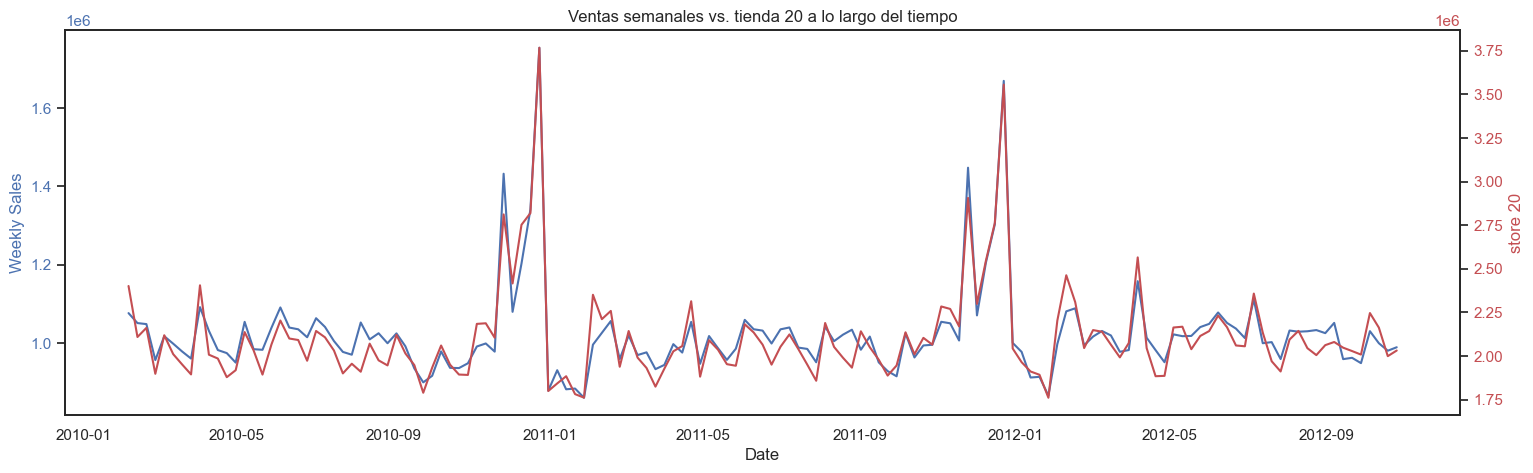

In [93]:

fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(store_sales_not20['Date'], store_sales_not20['Weekly_Sales'], color='b', label='all stores Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(store_sales_20['Date'], store_sales_20['Weekly_Sales'], color='r', label='store 20')
ax2.set_ylabel('store 20', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Ventas semanales vs. tienda 20 a lo largo del tiempo');


**Observación**: es obvio que la tienda 20 tiene picos de ventas más altos que el resto de tiendas, lo que significa que es la tienda con mejor desempeño.

<h1 align="left" style="color:Blue; "> <b> <font  color = '#F5CAC3'>¿Cómo se correlacionan el índice de precios al consumidor (IPC) y la tasa de desempleo con las ventas?</font> </h1>

**¿Qué es el IPC?**:
El índice de precios al consumidor (IPC) es una medida que examina el cambio promedio en los precios que pagan los consumidores por una canasta de bienes y servicios a lo largo del tiempo. Es uno de los indicadores de inflación más utilizados.

In [94]:
df.groupby('Date')['CPI'].std()

Date
2010-02-05    38.692144
2010-02-12    38.732430
2010-02-19    38.737027
2010-02-26    38.735680
2010-03-05    38.734337
                ...    
2012-09-28    41.517399
2012-10-05    41.588349
2012-10-12    41.659314
2012-10-19    41.688018
2012-10-26    41.709751
Name: CPI, Length: 143, dtype: float64

In [95]:
CPI= df.groupby('Date')['CPI'].mean().reset_index()
CPI

,Date,CPI
0,2010-02-05,167.730885
1,2010-02-12,167.825608
2,2010-02-19,167.871686
3,2010-02-26,167.909657
4,2010-03-05,167.947628
...,...,...
138,2012-09-28,176.373588
139,2012-10-05,176.505052
140,2012-10-12,176.636515
141,2012-10-19,176.652613


In [96]:
date_sales= pd.merge(CPI, date_sales, on='Date', how='inner')
date_sales

,Date,CPI,Fuel_Price,Holiday_Flag,Temperature,Weekly_Sales
0,2010-02-05,167.730885,2.717844,0.0,34.037333,49750740.50
1,2010-02-12,167.825608,2.694022,1.0,34.151333,48336677.63
2,2010-02-19,167.871686,2.672067,0.0,37.719778,48276993.78
3,2010-02-26,167.909657,2.683933,0.0,39.243556,43968571.13
4,2010-03-05,167.947628,2.731200,0.0,42.917333,46871470.30
...,...,...,...,...,...,...
138,2012-09-28,176.373588,3.854578,0.0,68.754444,43734899.40
139,2012-10-05,176.505052,3.845222,0.0,65.973111,47566639.31
140,2012-10-12,176.636515,3.896733,0.0,58.342667,46128514.25
141,2012-10-19,176.652613,3.880000,0.0,60.705333,45122410.57


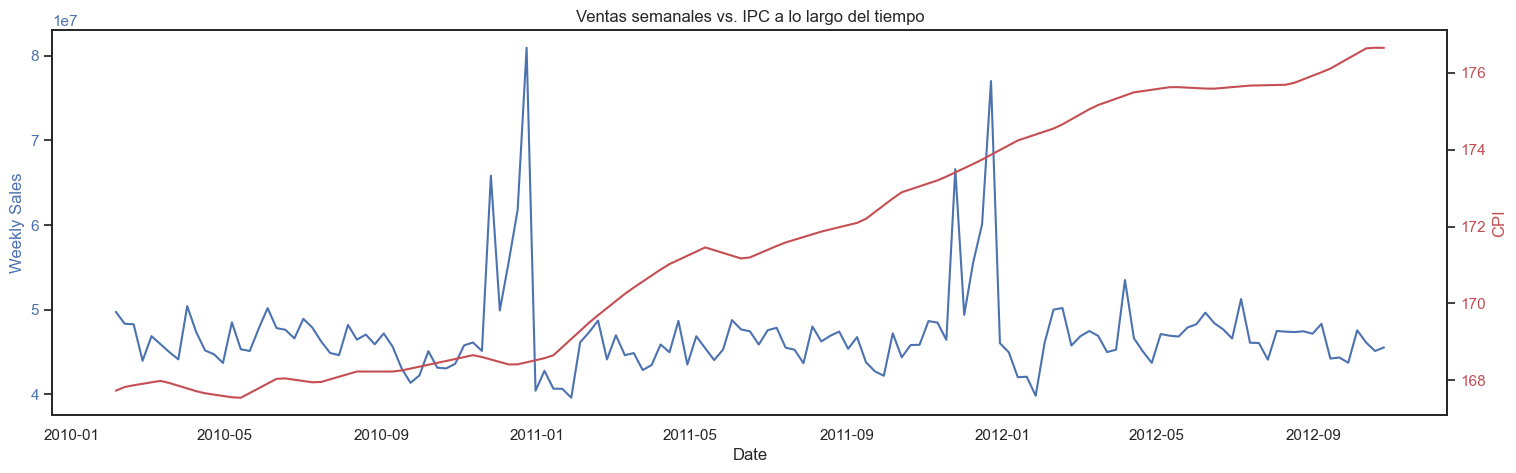

In [97]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['CPI'], color='r', label='CPI')
ax2.set_ylabel('CPI', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Ventas semanales vs. IPC a lo largo del tiempo');

**Observación**: dado que el IPC indica principalmente la inflación, no tiene correlación directa con las ventas extras.

In [98]:
df['Unemployment'].describe()

count    6435.000000
mean        7.999151
std         1.875885
min         3.879000
25%         6.891000
50%         7.874000
75%         8.622000
max        14.313000
Name: Unemployment, dtype: float64

In [99]:
Unemployment= df.groupby('Date')['Unemployment'].mean().reset_index()
Unemployment

,Date,Unemployment
0,2010-02-05,8.619311
1,2010-02-12,8.619311
2,2010-02-19,8.619311
3,2010-02-26,8.619311
4,2010-03-05,8.619311
...,...,...
138,2012-09-28,7.237333
139,2012-10-05,6.953711
140,2012-10-12,6.953711
141,2012-10-19,6.953711


In [100]:
date_sales= pd.merge(Unemployment, date_sales, on='Date', how='inner')
date_sales

,Date,Unemployment,CPI,Fuel_Price,Holiday_Flag,Temperature,Weekly_Sales
0,2010-02-05,8.619311,167.730885,2.717844,0.0,34.037333,49750740.50
1,2010-02-12,8.619311,167.825608,2.694022,1.0,34.151333,48336677.63
2,2010-02-19,8.619311,167.871686,2.672067,0.0,37.719778,48276993.78
3,2010-02-26,8.619311,167.909657,2.683933,0.0,39.243556,43968571.13
4,2010-03-05,8.619311,167.947628,2.731200,0.0,42.917333,46871470.30
...,...,...,...,...,...,...,...
138,2012-09-28,7.237333,176.373588,3.854578,0.0,68.754444,43734899.40
139,2012-10-05,6.953711,176.505052,3.845222,0.0,65.973111,47566639.31
140,2012-10-12,6.953711,176.636515,3.896733,0.0,58.342667,46128514.25
141,2012-10-19,6.953711,176.652613,3.880000,0.0,60.705333,45122410.57


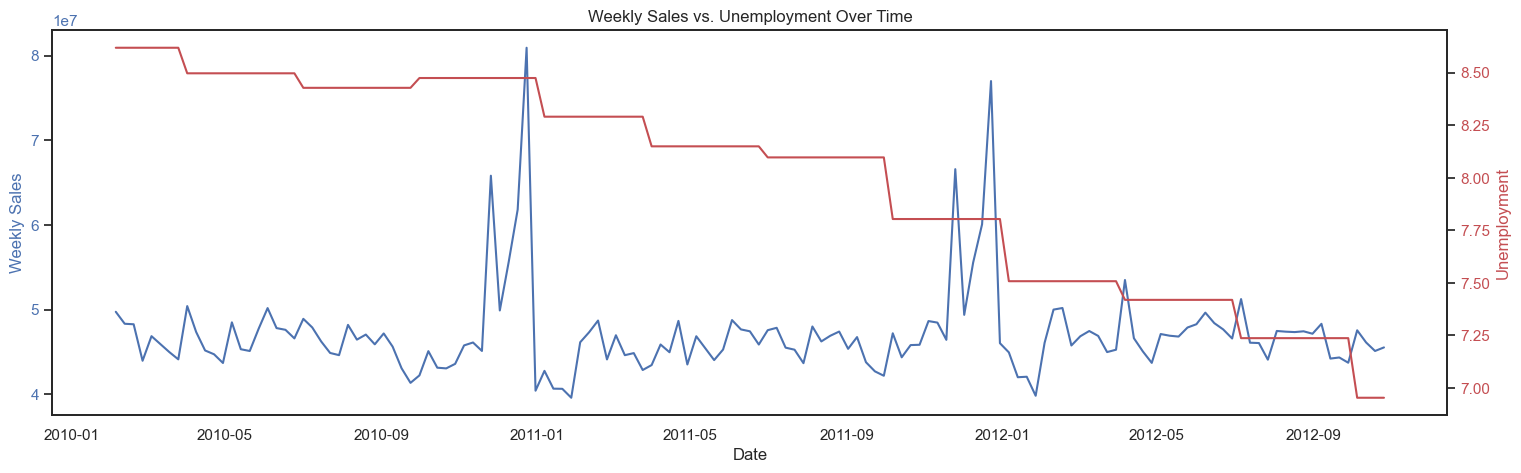

In [101]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Unemployment'], color='r', label='Unemployment')
ax2.set_ylabel('Unemployment', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Unemployment Over Time');


**Observación**: el desempleo no afecta las ventas, sin embargo disminuye considerablemente con el tiempo.

In [102]:
df[df['Date']=='2010-02-05']['CPI']

0       211.096358
143     210.752605
286     214.424881
429     126.442065
572     211.653972
715     212.622352
858     189.381697
1001    214.471451
1144    214.655459
1287    126.442065
1430    214.424881
1573    126.442065
1716    126.442065
1859    181.871190
2002    131.527903
2145    189.381697
2288    126.442065
2431    131.527903
2574    131.527903
2717    204.247194
2860    210.752605
3003    135.352461
3146    131.527903
3289    131.527903
3432    204.247194
3575    131.527903
3718    135.352461
3861    126.442065
4004    131.527903
4147    210.752605
4290    210.752605
4433    189.381697
4576    126.442065
4719    126.442065
4862    135.352461
5005    209.852966
5148    209.852966
5291    126.442065
5434    209.852966
5577    131.527903
5720    189.381697
5863    126.442065
6006    203.064274
6149    126.442065
6292    181.871190
Name: CPI, dtype: float64

- sales over the years

In [103]:
date_sales 

,Date,Unemployment,CPI,Fuel_Price,Holiday_Flag,Temperature,Weekly_Sales
0,2010-02-05,8.619311,167.730885,2.717844,0.0,34.037333,49750740.50
1,2010-02-12,8.619311,167.825608,2.694022,1.0,34.151333,48336677.63
2,2010-02-19,8.619311,167.871686,2.672067,0.0,37.719778,48276993.78
3,2010-02-26,8.619311,167.909657,2.683933,0.0,39.243556,43968571.13
4,2010-03-05,8.619311,167.947628,2.731200,0.0,42.917333,46871470.30
...,...,...,...,...,...,...,...
138,2012-09-28,7.237333,176.373588,3.854578,0.0,68.754444,43734899.40
139,2012-10-05,6.953711,176.505052,3.845222,0.0,65.973111,47566639.31
140,2012-10-12,6.953711,176.636515,3.896733,0.0,58.342667,46128514.25
141,2012-10-19,6.953711,176.652613,3.880000,0.0,60.705333,45122410.57


In [104]:
sales_2010= date_sales[date_sales['Date'].dt.year == 2010]['Weekly_Sales']
sales_2010

0     49750740.50
1     48336677.63
2     48276993.78
3     43968571.13
4     46871470.30
5     45925396.51
6     44988974.64
7     44133961.05
8     50423831.26
9     47365290.44
10    45183667.08
11    44734452.56
12    43705126.71
13    48503243.52
14    45330080.20
15    45120108.06
16    47757502.56
17    50188543.12
18    47826546.72
19    47622046.23
20    46609036.29
21    48917484.50
22    47899529.37
23    46243899.58
24    44888849.11
25    44630363.42
26    48204999.12
27    46464418.41
28    47060952.92
29    45909740.44
30    47194257.61
31    45634397.84
32    43080726.51
33    41358514.41
34    42239875.87
35    45102974.23
36    43149473.45
37    43066669.52
38    43602830.95
39    45781981.89
40    46124800.83
41    45125584.18
42    65821003.24
43    49909027.88
44    55666770.39
45    61820799.85
46    80931415.60
47    40432519.00
Name: Weekly_Sales, dtype: float64

In [105]:
sales_2011= date_sales[date_sales['Date'].dt.year == 2011]['Weekly_Sales']
sales_2011

48    42775787.77
49    40673678.04
50    40654648.03
51    39599852.99
52    46153111.12
53    47336192.79
54    48716164.12
55    44125859.84
56    46980603.74
57    44627319.40
58    44872325.97
59    42876199.18
60    43458991.19
61    45887466.80
62    44973328.14
63    48676692.06
64    43530032.78
65    46861958.29
66    45446144.82
67    44046598.01
68    45293457.04
69    48771994.18
70    47669734.66
71    47447561.77
72    45884094.58
73    47578519.50
74    47859263.78
75    45515929.92
76    45274411.39
77    43683274.28
78    48015466.97
79    46249569.21
80    46917347.62
81    47416948.45
82    45376623.27
83    46763227.53
84    43793960.08
85    42718096.73
86    42195830.81
87    47211688.36
88    44374820.30
89    45818953.44
90    45855821.05
91    48655544.30
92    48474224.75
93    46438980.56
94    66593605.26
95    49390556.49
96    55561147.70
97    60085695.94
98    76998241.31
99    46042461.04
Name: Weekly_Sales, dtype: float64

In [106]:
sales_2012= date_sales[date_sales['Date'].dt.year == 2012]['Weekly_Sales']
sales_2012

100    44955421.95
101    42023078.48
102    42080996.56
103    39834974.67
104    46085608.09
105    50009407.92
106    50197056.96
107    45771506.57
108    46861034.97
109    47480454.11
110    46901504.94
111    44993794.45
112    45272862.02
113    53502315.87
114    46629261.41
115    45072529.78
116    43716798.89
117    47124197.93
118    46925878.99
119    46823939.22
120    47892463.31
121    48281649.72
122    49651171.78
123    48412110.70
124    47668284.97
125    46597112.12
126    51253021.88
127    46099732.10
128    46059543.45
129    44097154.97
130    47485899.56
131    47403451.04
132    47354452.05
133    47447323.60
134    47159639.43
135    48330059.31
136    44226038.65
137    44354547.11
138    43734899.40
139    47566639.31
140    46128514.25
141    45122410.57
142    45544116.29
Name: Weekly_Sales, dtype: float64

In [107]:
combined_data = pd.concat([sales_2010, sales_2011, sales_2012], keys=['2010', '2011', '2012'])
combined_data

2010  0      49750740.50
      1      48336677.63
      2      48276993.78
      3      43968571.13
      4      46871470.30
                ...     
2012  138    43734899.40
      139    47566639.31
      140    46128514.25
      141    45122410.57
      142    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [108]:
px.box(combined_data, x=combined_data.index.get_level_values(0), y='Weekly_Sales',
             labels={'Weekly_Sales': 'Weekly Sales', 'level_0': 'Year'},
             title='Box Plot for 2010, 2011, and 2012')

**Observación**: las ventas alcanzaron su máximo en 2010. La mediana de los tres años fue casi la misma. Las ventas alcanzaron su mínimo en 2011.

## Model Building

In [110]:
sales_group = df.groupby(['Date'])[['Weekly_Sales']].mean()
sales_group

,Weekly_Sales
Date,
2010-02-05,1.105572e+06
2010-02-12,1.074148e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05
2010-03-05,1.041588e+06
...,...
2012-09-28,9.718867e+05
2012-10-05,1.057036e+06
2012-10-12,1.025078e+06


Para probar la estacionariedad, utilizaremos la **Prueba de Dickey Fuller aumentada**:

- Hipótesis nula: supone que la serie temporal no es estacionaria.
- Hipótesis alternativa: si se rechaza la hipótesis nula, entonces la serie temporal es estacionaria.

Para que se rechace la hipótesis nula y se acepte que la serie temporal es estacionaria, existen 2 requisitos:

- Valor crítico (5 %) > Estadístico de prueba
- Valor p < 0,05


In [130]:
def test_stationarity(timeseries):
    plt.figure(figsize=(18,6))
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    df_test = adfuller(timeseries['Weekly_Sales'], autolag='AIC')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

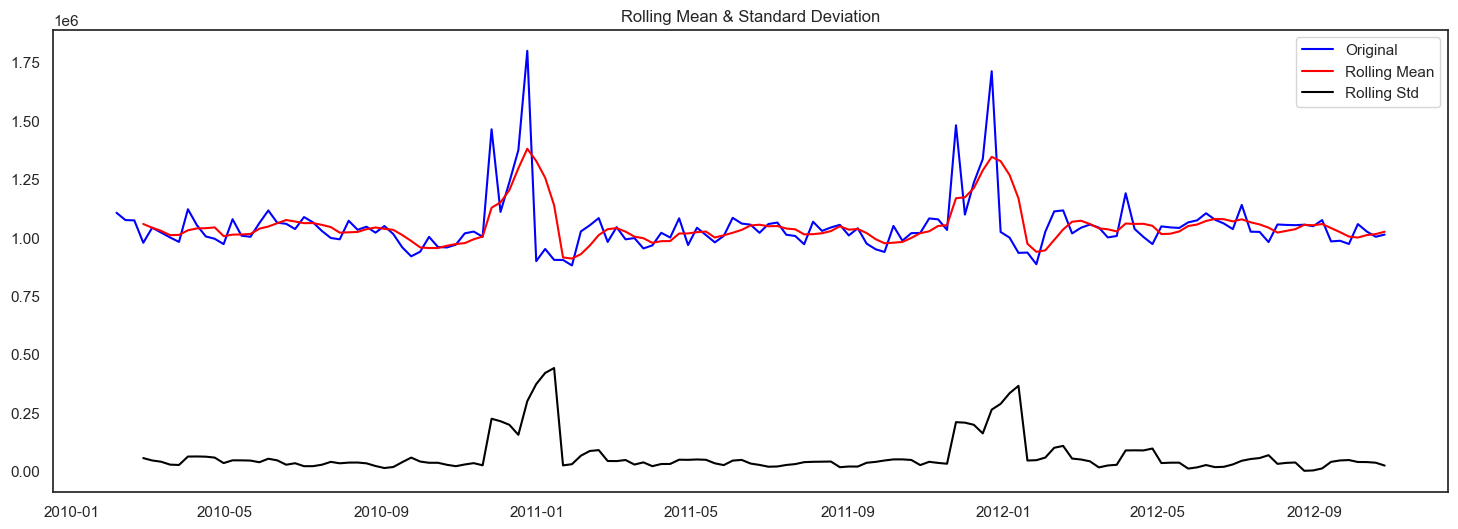

Results of Dickey Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [131]:

test_stationarity(sales_group)

**Observación**: El valor p es muy pequeño (mucho menor que 0,05), lo que indica que los datos son estacionarios. Además, los valores críticos están de alguna manera cerca de la estadística de prueba, lo que también implica que nuestros datos son estacionarios. Sin embargo, el gráfico muestra que la media móvil es casi tan cercana a la serie temporal original, pero la desviación estándar móvil no se acerca en absoluto.

<h5><font  color='Red'>Decomposition</font> </h5>

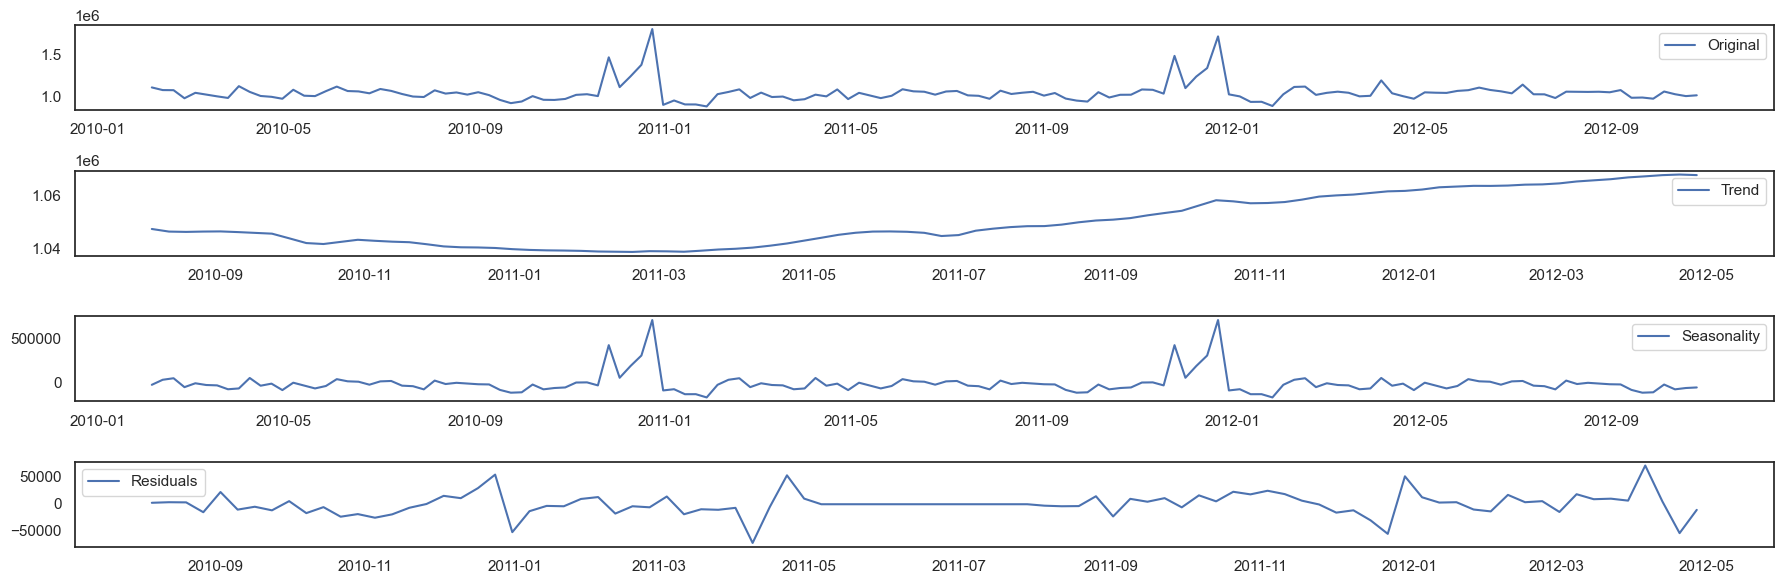

In [132]:
plt.figure(figsize=(18,6))
decomposition = seasonal_decompose(sales_group)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sales_group, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Observation**: Data clearly has a linear uptrend and a seasonal pattern of a 1 year duration is present in the data.

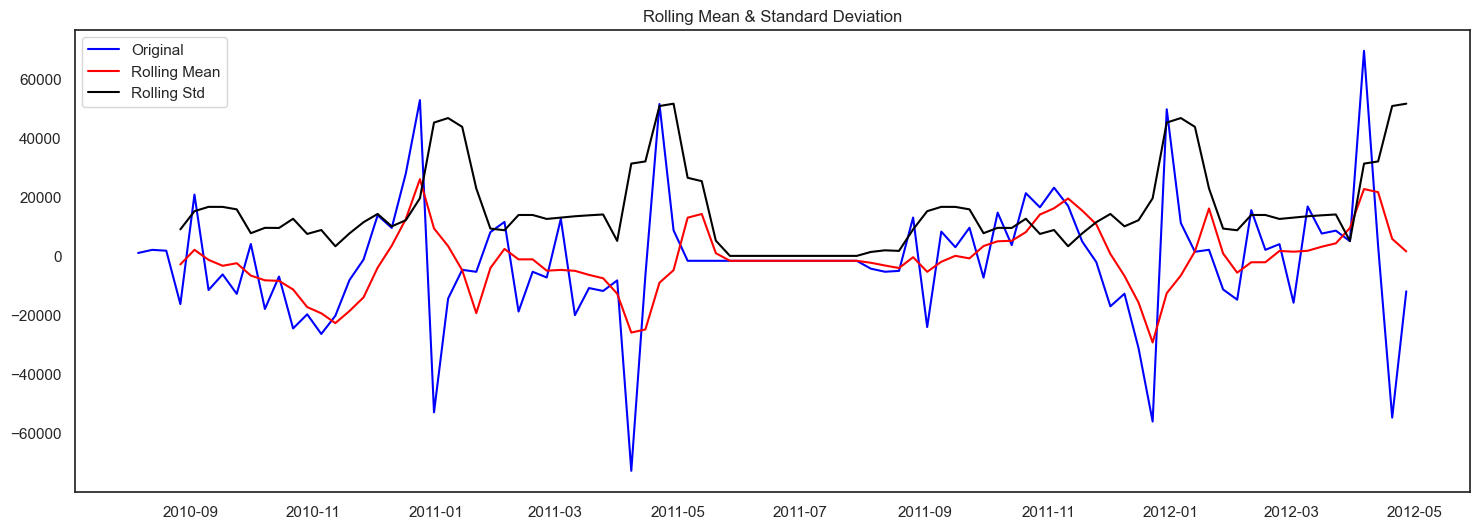

In [135]:
plt.figure(figsize=(18,6)) 
rollmean_decompose = residual.rolling(window=4).mean()
rollstd_decompose = residual.rolling(window=4).std()

plt.plot(residual, color='blue', label='Original')
plt.plot(rollmean_decompose, color='red', label='Rolling Mean')
plt.plot(rollstd_decompose, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

<h5><font  color='Red'>ACF and PCF</font> </h5>

In [136]:
lag_acf = acf(sales_group, nlags=20)
lag_pacf = pacf(sales_group, nlags=20, method='ols')

In [137]:
lag_acf

array([ 1.        ,  0.33740034,  0.22062903,  0.07237072,  0.17385451,
       -0.23191845, -0.15784759, -0.08470098, -0.07518064, -0.12806261,
       -0.10594217, -0.0569027 , -0.10607277, -0.11128366, -0.09176246,
        0.01405238,  0.00254805,  0.00357038, -0.04464742, -0.0071724 ,
       -0.03018732])

In [138]:
lag_pacf

array([ 1.00000000e+00,  3.37606200e-01,  1.21000171e-01, -3.84011776e-02,
        1.55157444e-01, -3.86062375e-01, -1.93162950e-02,  9.51229028e-02,
       -1.15600779e-01,  6.13553529e-02, -1.35870944e-01, -6.58972716e-02,
       -1.92598844e-02, -1.07523539e-01,  9.29781701e-04,  5.51499464e-02,
       -3.47138618e-02, -1.94128302e-02, -1.25864473e-01, -4.92133100e-02,
        1.73015702e-02])

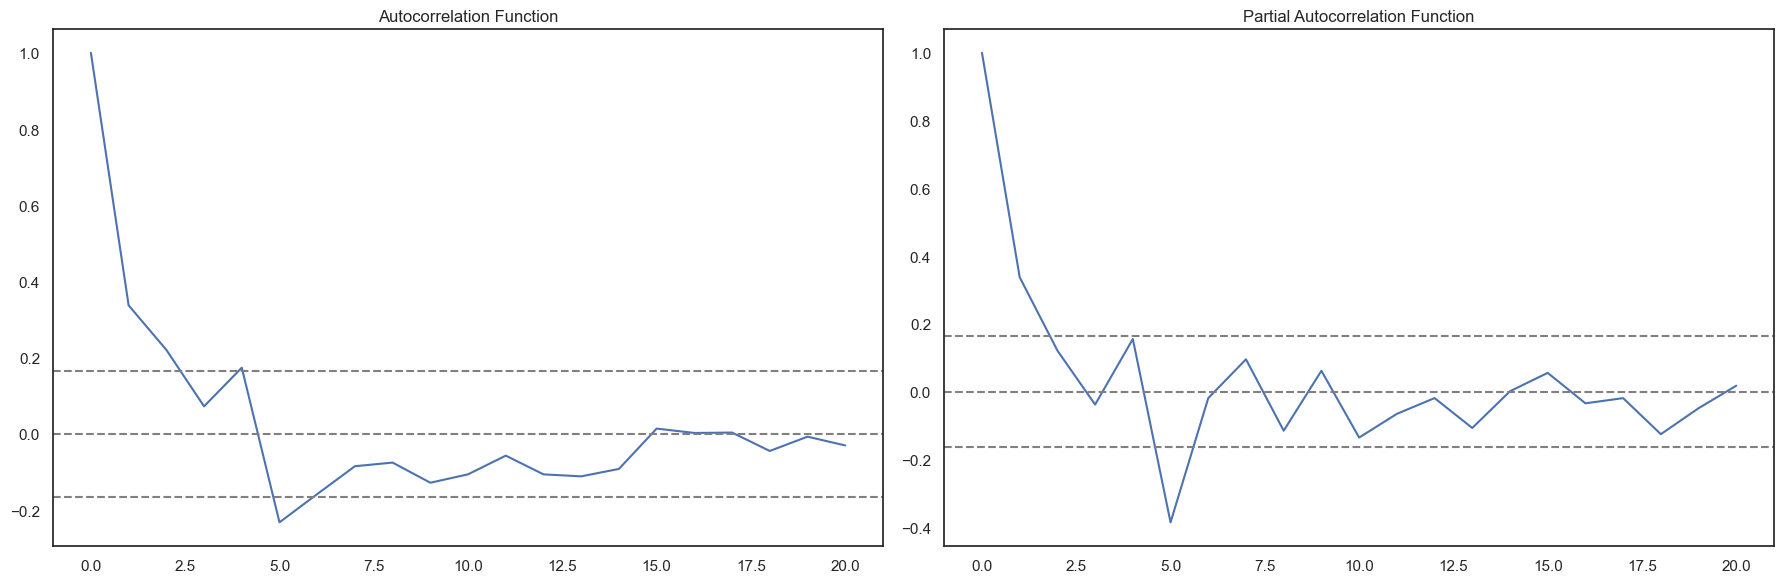

In [139]:
plt.figure(figsize=(18,6))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

- ## Seleccionamos las variables

In [140]:
walmart = df.copy()
walmart = walmart.rename(columns={"Store":"unique_id", "Date":"ds", "Weekly_Sales":"y"})
walmart

,unique_id,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [141]:
walmart["ds"] = walmart["ds"]+ timedelta(days = 2)
walmart

,unique_id,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-07,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-14,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-21,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-28,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-07,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-30,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-07,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-14,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-21,718125.53,0,56.47,3.969,192.330854,8.667


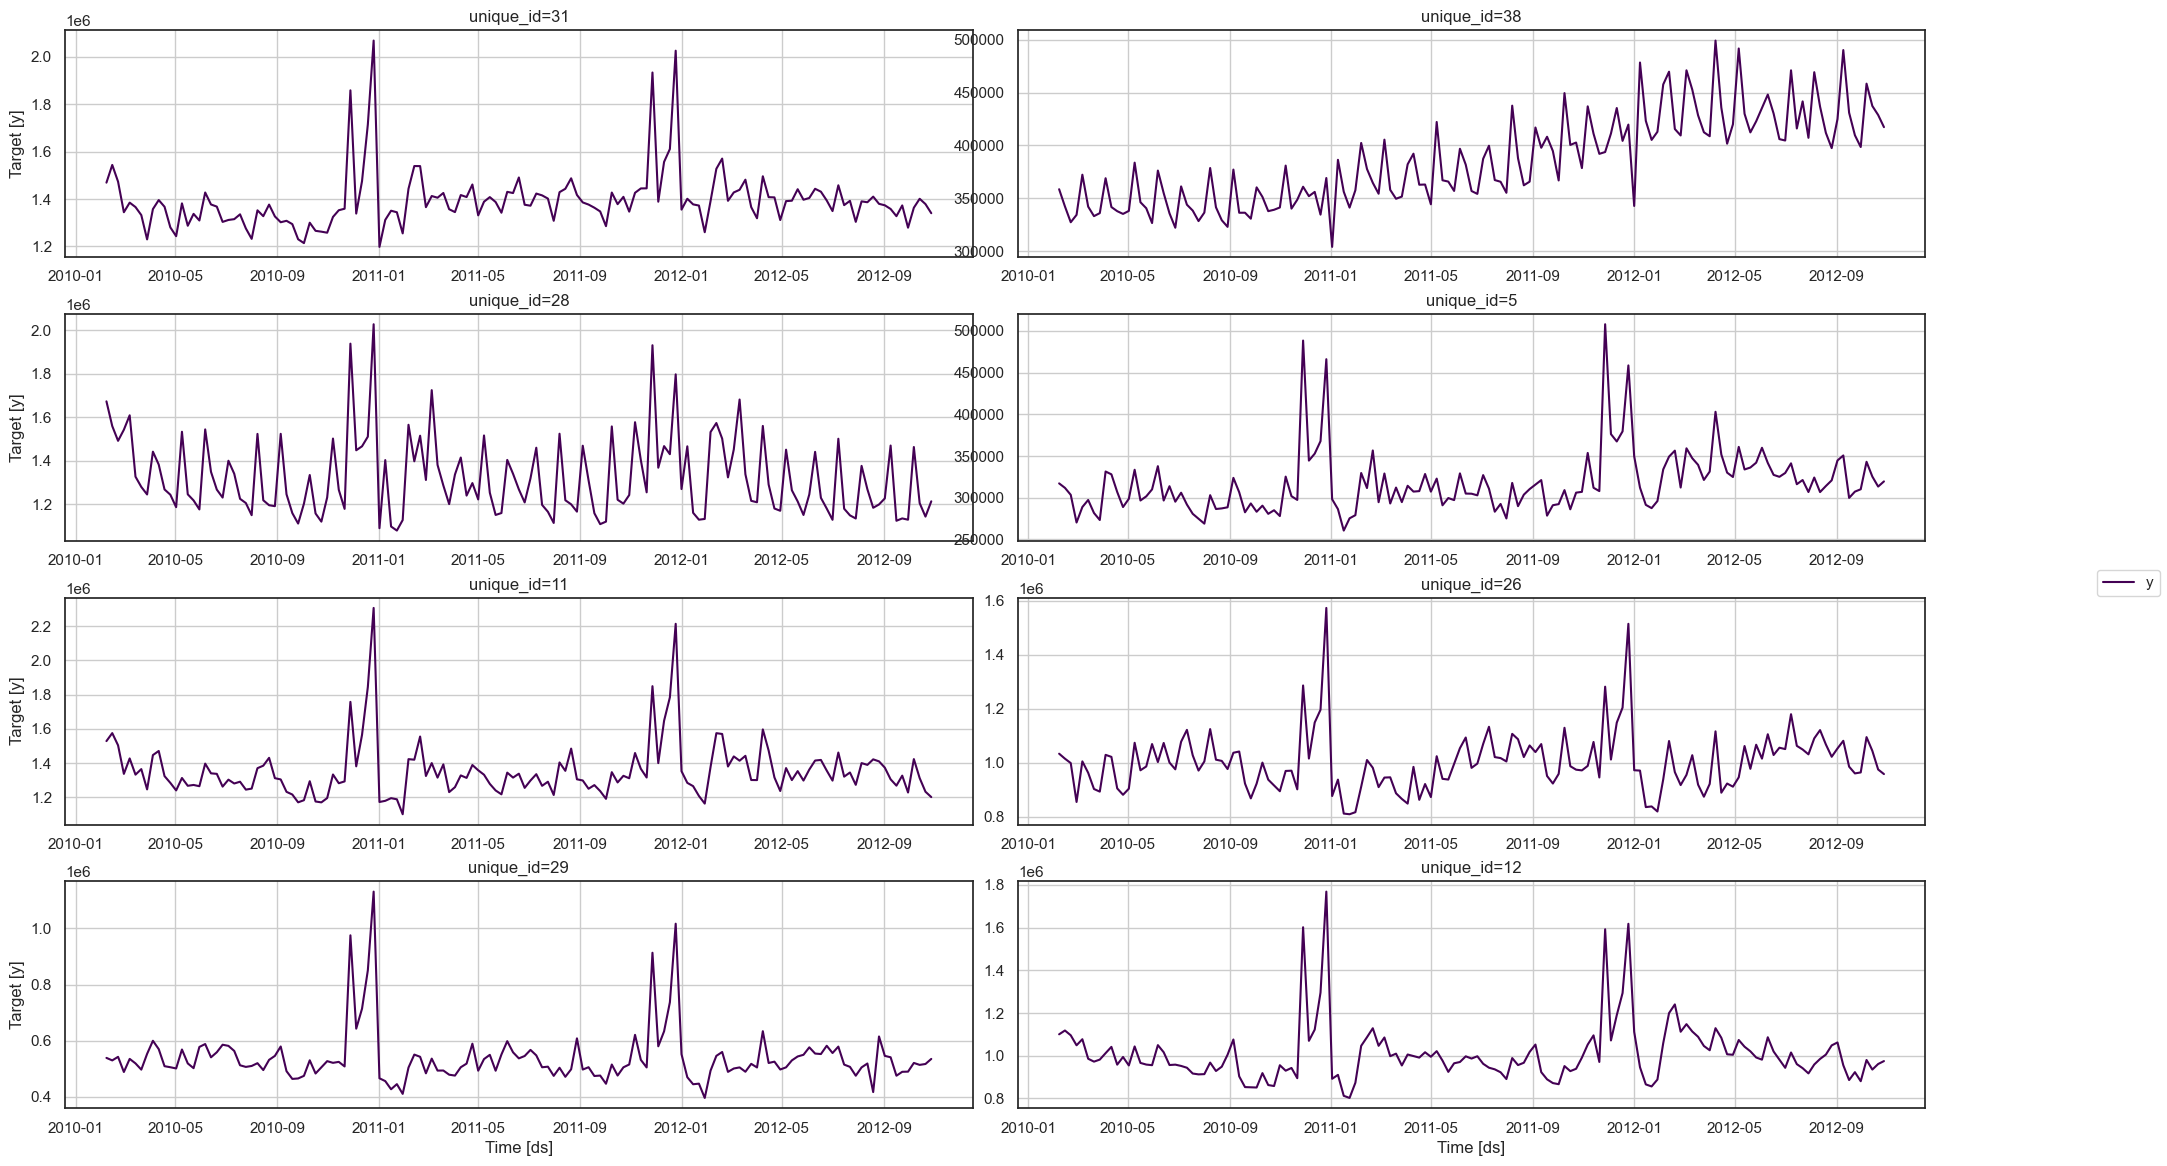

In [142]:
plot_series(walmart)

## División de los Datos:

1. Datos de Entrenamiento
2. Datos de Prueba 

Vamos a predecir las ventas semanales de los próximos 3 meses.

In [ ]:
#walmart[walmart["unique_id"] == 1].tail(13)

In [143]:
train = walmart.loc[walmart['ds'] <= '2012-08-05']
test = walmart.loc[walmart['ds'] > '2012-08-05']

test.drop("y",axis=1, inplace=True)

train.shape, test.shape

((5895, 8), (540, 7))

## Cargamos librerias

In [1]:
from statsforecast import StatsForecast

from statsforecast.models import AutoARIMA
from statsforecast.models import MSTL
from statsforecast.models import SeasonalNaive
from statsforecast.models import MFLES

## Construimos el modelo

In [145]:
season_length = 52 # Weekly data 

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length)]

In [146]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
                   models=models,
                   freq = "W", 
                   fallback_model = SeasonalNaive(season_length=season_length),
                   n_jobs=-1)

## Entrenamos el modelo univariado

1. Contruimos primero los intervalos de confianza con `cross validation`
2. Entrenamos el modelo

In [147]:
from statsforecast.utils import ConformalIntervals

intervals = ConformalIntervals(h = 12, n_windows = 5)

# fit the models
sf.fit(df = train, prediction_intervals = intervals)

StatsForecast(models=[AutoARIMA,SeasonalNaive])

## Forecasting

In [148]:
# Prediction
Y_hat = sf.forecast(h = 12, level = [80, 95], fitted = True, X_df = test)

Y_hat

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-lo-80,SeasonalNaive-hi-80,SeasonalNaive-hi-95
unique_id,,,,,,,,,,,
1,2012-08-12,1.629470e+06,1.537207e+06,1.552693e+06,1.706247e+06,1.721733e+06,1.525147e+06,1.376610e+06,1.434050e+06,1.616244e+06,1.673684e+06
1,2012-08-19,1.638322e+06,1.489233e+06,1.540699e+06,1.735945e+06,1.787411e+06,1.530761e+06,1.419919e+06,1.438596e+06,1.622926e+06,1.641604e+06
1,2012-08-26,1.567564e+06,1.331190e+06,1.404468e+06,1.730661e+06,1.803939e+06,1.464694e+06,1.363606e+06,1.427063e+06,1.502324e+06,1.565781e+06
1,2012-09-02,1.657238e+06,1.131835e+06,1.472779e+06,1.841697e+06,2.182641e+06,1.550229e+06,1.434601e+06,1.440999e+06,1.659460e+06,1.665858e+06
1,2012-09-09,1.667613e+06,1.430220e+06,1.537419e+06,1.797807e+06,1.905006e+06,1.540471e+06,1.411992e+06,1.416982e+06,1.663961e+06,1.668951e+06
...,...,...,...,...,...,...,...,...,...,...,...
45,2012-09-30,7.130649e+05,6.390415e+05,6.572328e+05,7.688971e+05,7.870884e+05,6.989863e+05,6.285139e+05,6.410258e+05,7.569468e+05,7.694587e+05
45,2012-10-07,8.108718e+05,6.752056e+05,7.163994e+05,9.053441e+05,9.465379e+05,7.534471e+05,6.913323e+05,7.132338e+05,7.936604e+05,8.155618e+05
45,2012-10-14,7.394392e+05,6.629599e+05,6.667268e+05,8.121517e+05,8.159186e+05,7.209470e+05,6.531604e+05,6.747698e+05,7.671242e+05,7.887336e+05


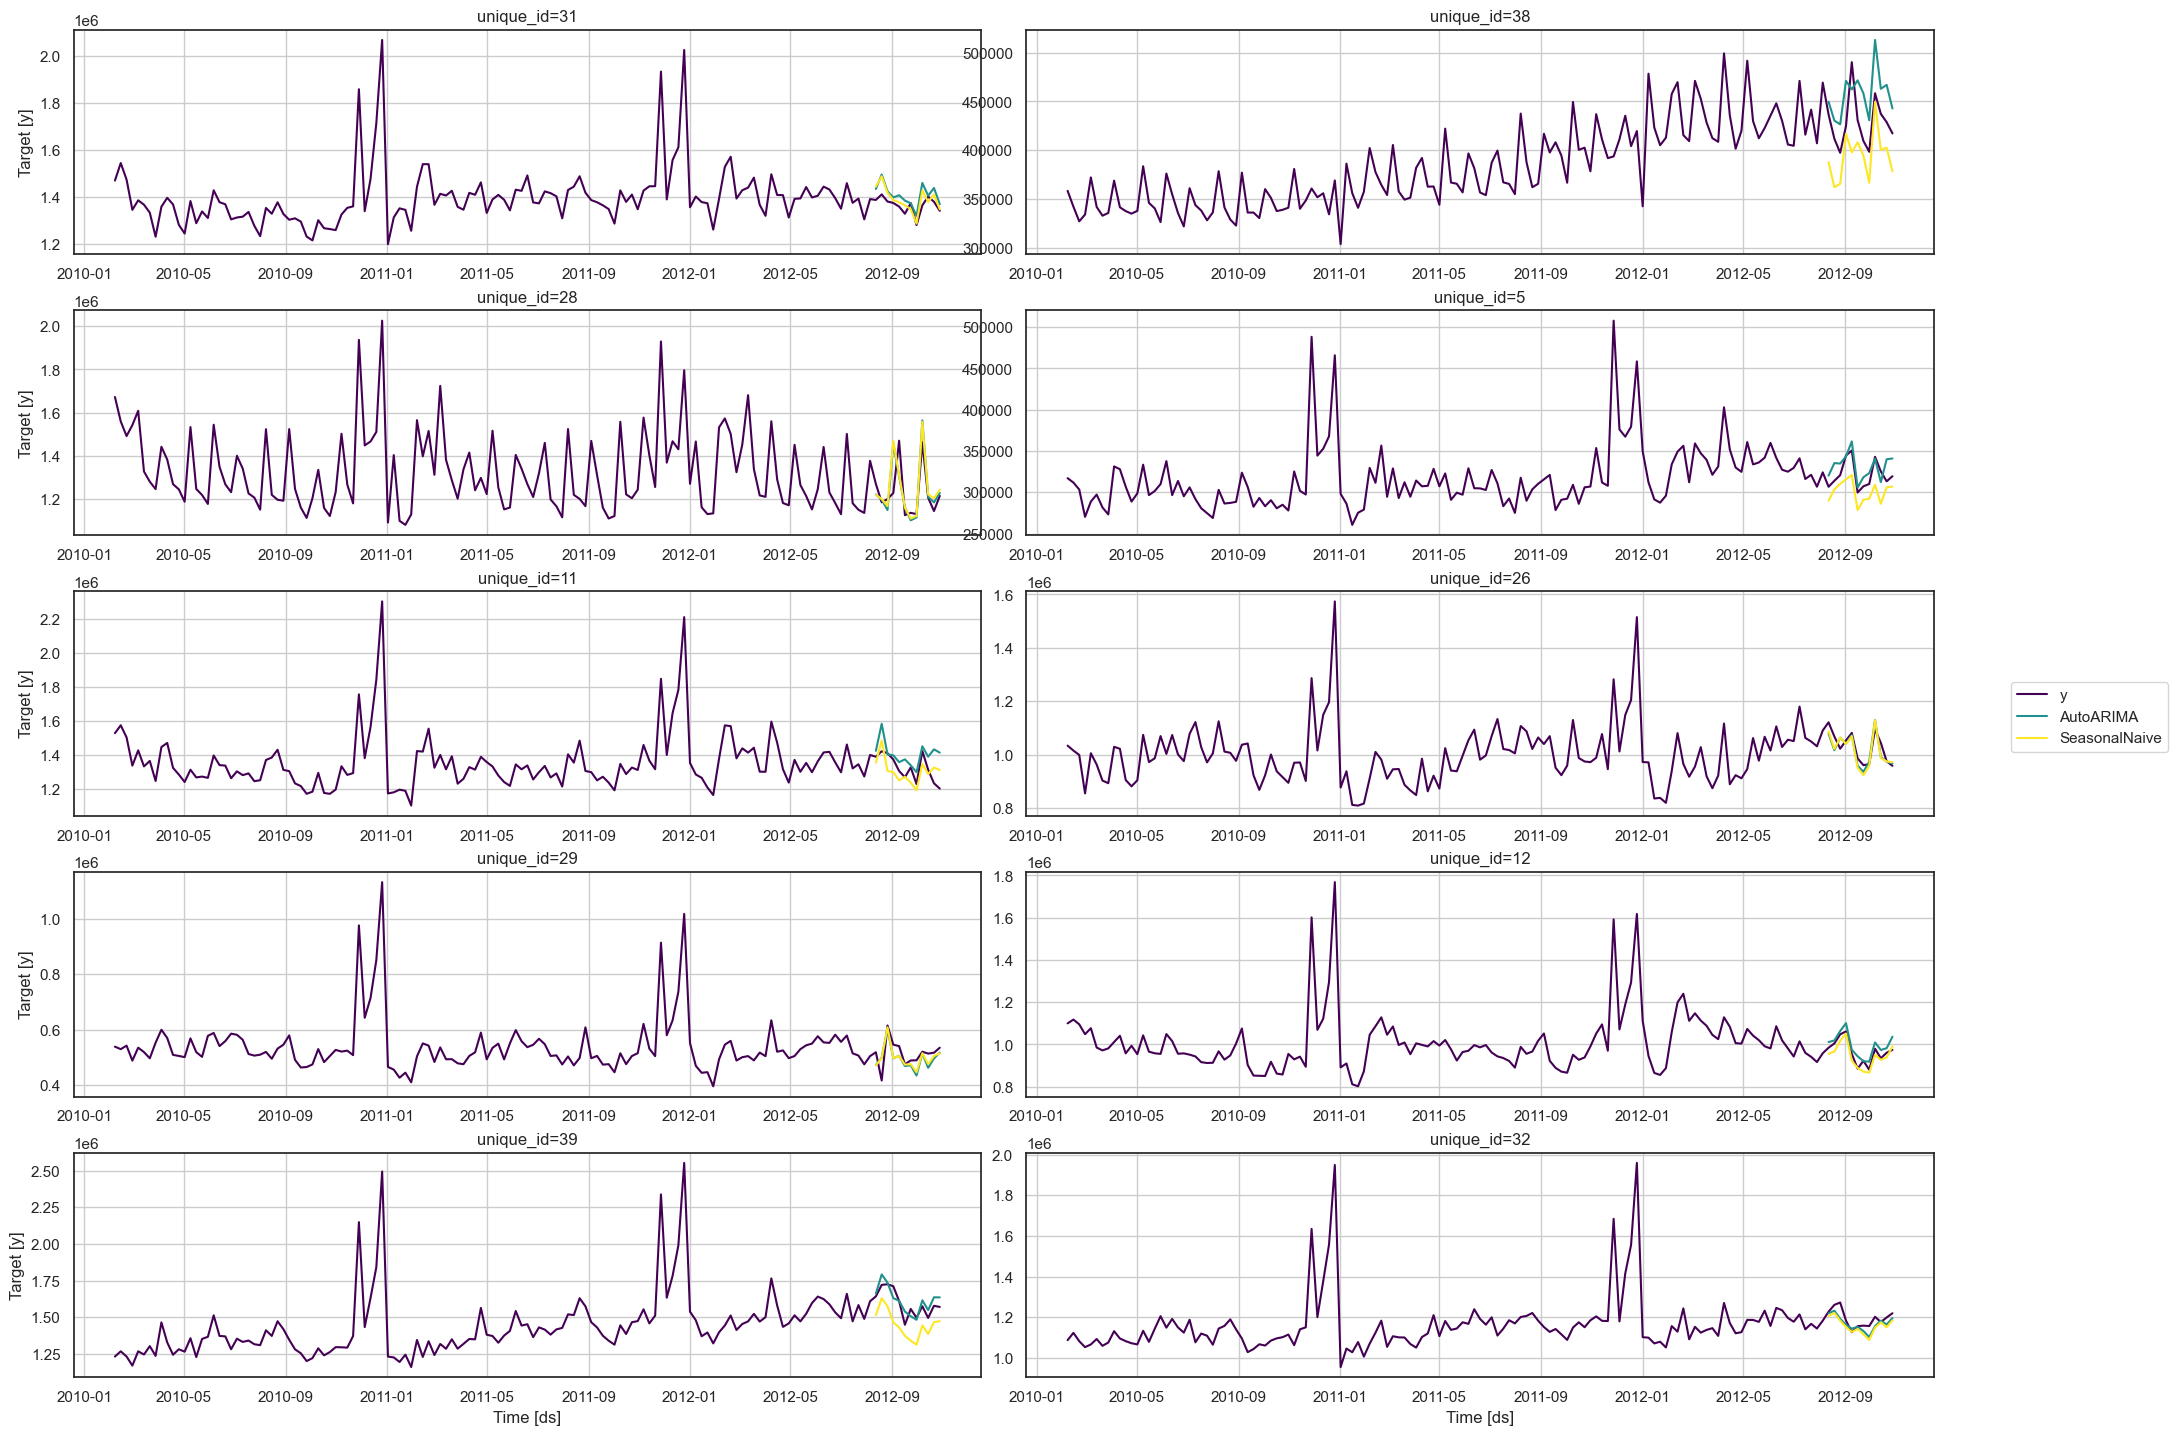

In [149]:
plot_series(walmart, Y_hat.reset_index(),  max_insample_length=500,  max_ids= 10)

## Evaluamos el modelo

Evaluamos los modelos usado usando el `Cross Validation` con diferentes tipo de metricas

In [150]:
cv_sf = sf.cross_validation(df = train, h = 12, n_windows = 5)

In [151]:
cv_sf

,ds,cutoff,y,AutoARIMA,SeasonalNaive
unique_id,,,,,
1,2012-04-22,2012-04-15,1.521578e+06,1.660380e+06,1.564820e+06
1,2012-04-29,2012-04-15,1.468928e+06,1.549534e+06,1.455091e+06
1,2012-05-06,2012-04-15,1.684520e+06,1.726255e+06,1.629391e+06
1,2012-05-13,2012-04-15,1.611096e+06,1.695942e+06,1.604776e+06
1,2012-05-20,2012-04-15,1.595902e+06,1.521671e+06,1.428218e+06
...,...,...,...,...,...
45,2012-07-08,2012-05-13,8.433611e+05,7.902240e+05,7.687181e+05
45,2012-07-15,2012-05-13,7.498171e+05,7.617870e+05,7.484352e+05
45,2012-07-22,2012-05-13,7.376136e+05,7.447651e+05,7.416252e+05


In [152]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape, mse 

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [153]:
evaluate_cross_validation(cv_sf, mape)

,AutoARIMA,SeasonalNaive,best_model
unique_id,,,
1,3.170315,5.444489,AutoARIMA
2,3.230536,4.690152,AutoARIMA
3,6.303357,9.848801,AutoARIMA
4,2.126416,6.044511,AutoARIMA
5,3.546244,8.646642,AutoARIMA
6,3.447591,4.366654,AutoARIMA
7,3.152068,7.192051,AutoARIMA
8,3.057323,3.674954,AutoARIMA
9,3.993541,4.383533,AutoARIMA


In [ ]:
evaluate_cross_validation(cv_sf, mae)

In [ ]:
evaluate_cross_validation(cv_sf, rmse)

In [154]:
from statsforecast.models import SklearnModel
from xgboost import XGBRegressor

In [155]:
xgb = [SklearnModel(XGBRegressor())]

In [156]:
# Instantiate StatsForecast class as sf
sf_xgb = StatsForecast(
                   models = xgb,
                   freq = "W", 
                   fallback_model = SeasonalNaive(season_length=season_length),
                   n_jobs=-1)

## Entrenamos el modelo univariado

1. Contruimos primero los intervalos de confianza con `cross validation`
2. Entrenamos el modelo

In [157]:
from statsforecast.utils import ConformalIntervals

intervals = ConformalIntervals(h = 12, n_windows = 5)

# fit the models
sf_xgb.fit(df = train, prediction_intervals = intervals)

StatsForecast(models=[XGBRegressor])

## Forecasting

In [158]:
preds = sf_xgb.forecast(
    df= train,
    h = 12,
    X_df = test, # Variables exogenas 
    prediction_intervals=ConformalIntervals(n_windows = 5, h= 32),
    level=[95],
)
preds.head()

,ds,XGBRegressor,XGBRegressor-lo-95,XGBRegressor-hi-95
unique_id,,,,
1,2012-08-12,1601565.750,1417059.000,1786072.500
1,2012-08-19,1560552.125,1408481.500,1712622.750
1,2012-08-26,1511352.250,1327844.875,1694859.625
1,2012-09-02,1566790.000,1162466.250,1971113.750
1,2012-09-09,1639215.375,1332989.750,1945441.000


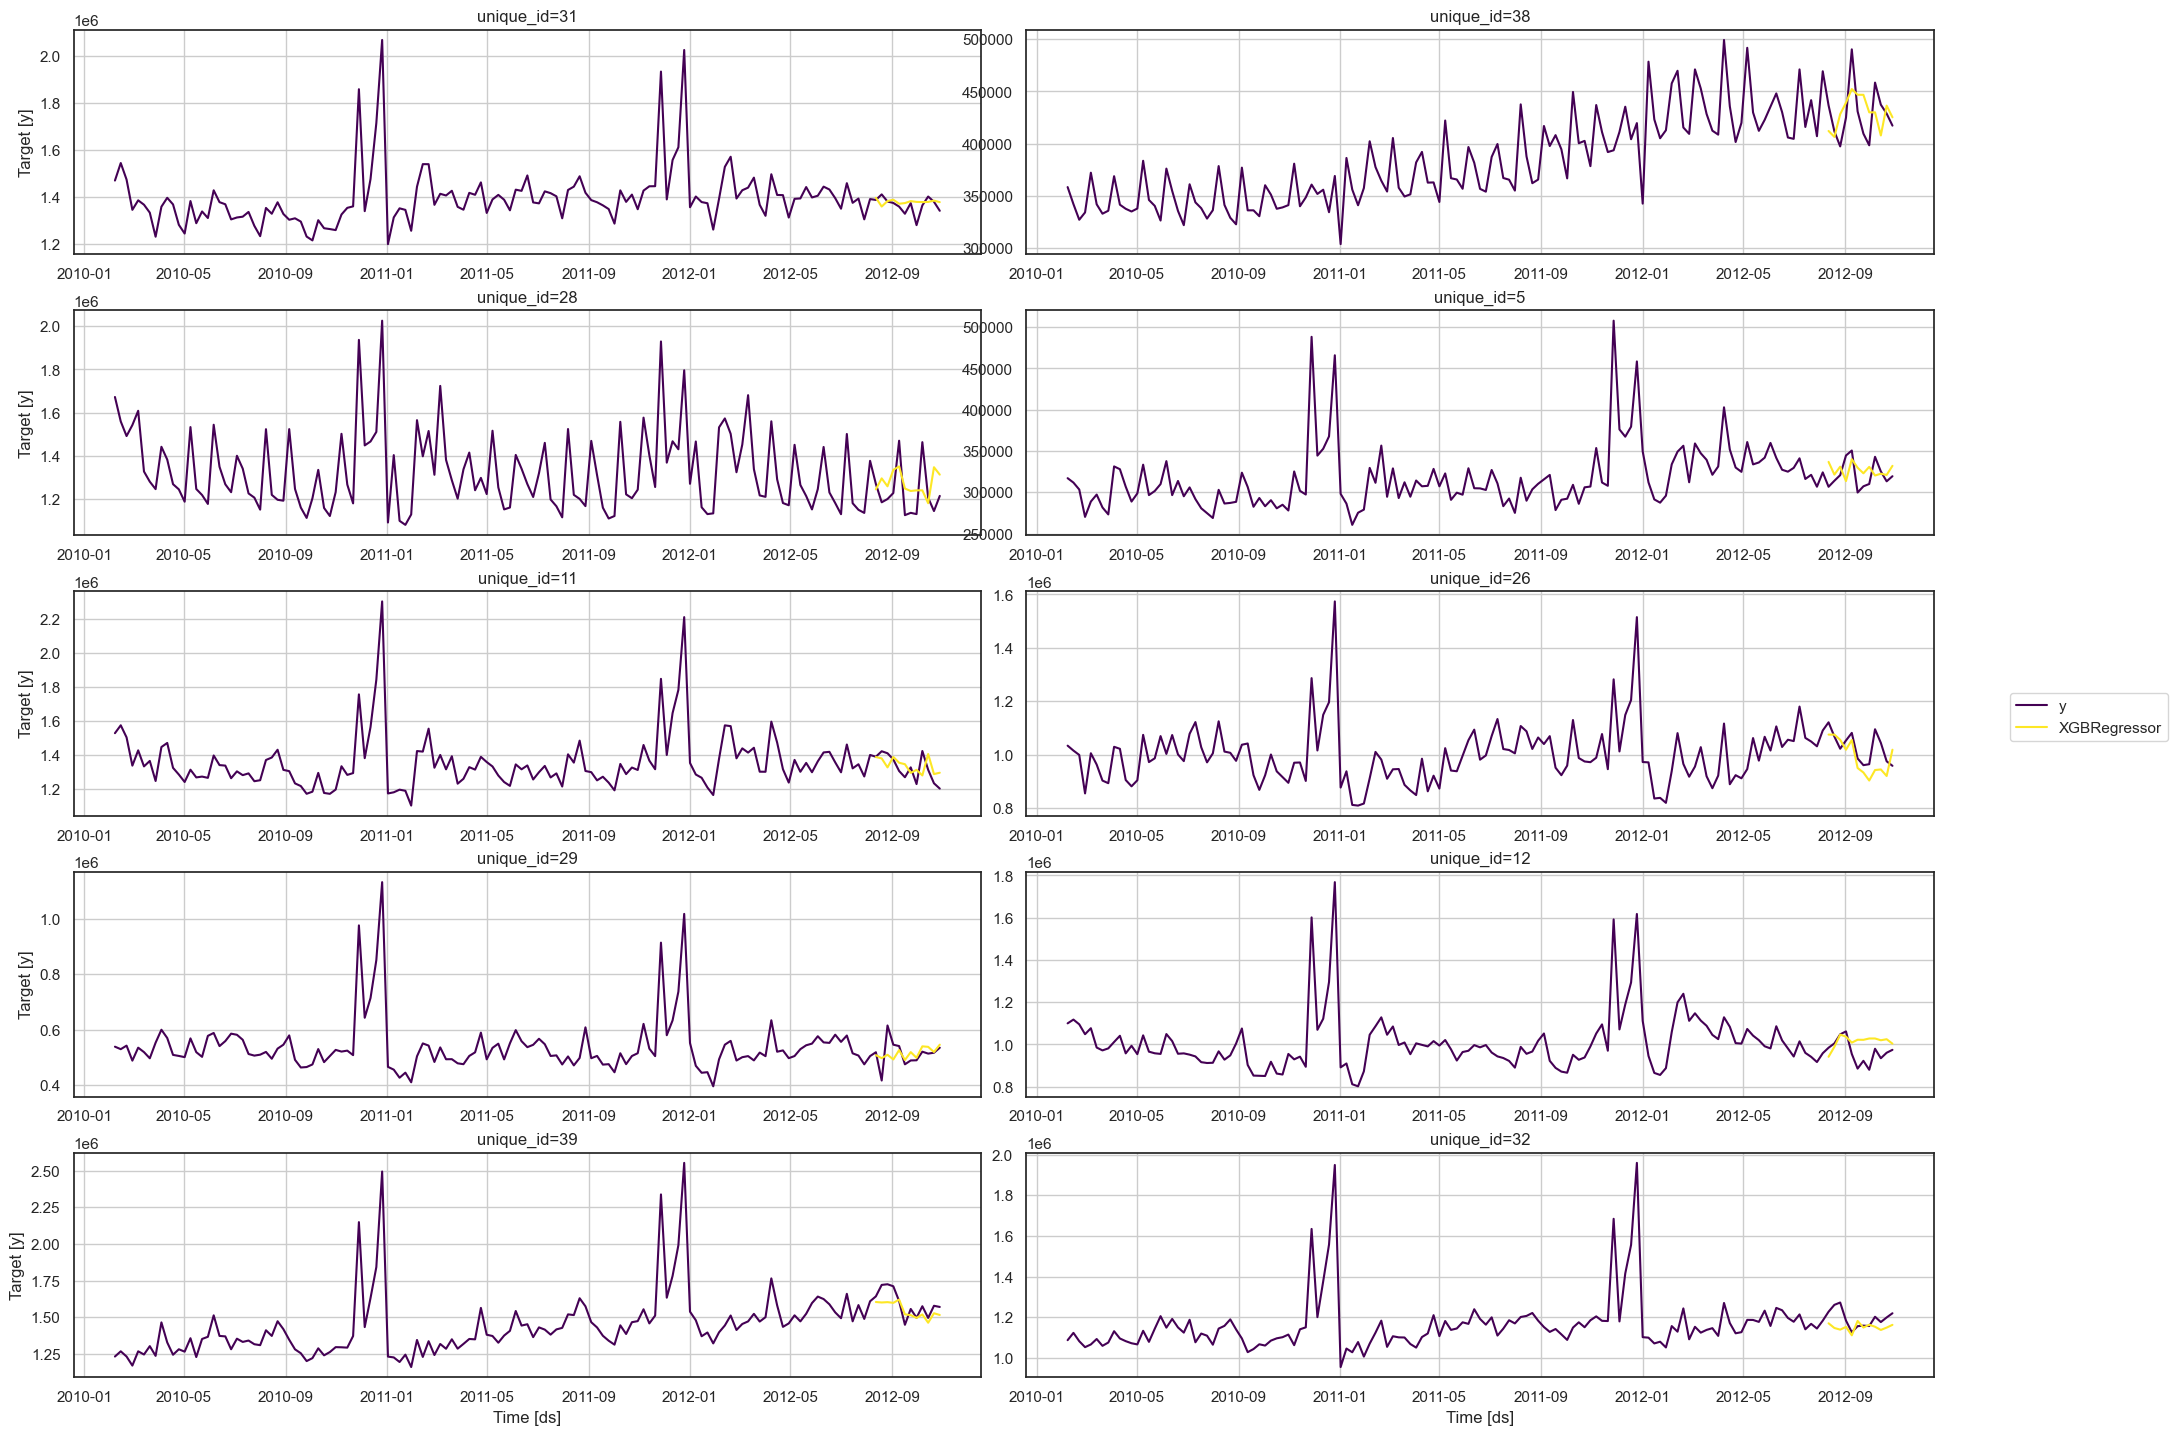

In [159]:
plot_series(walmart, preds.reset_index(),  max_insample_length=200,  max_ids= 10)

## Evaluamos el modelo

Evaluamos los modelos usado usando el `Cross Validation` con diferentes tipo de metricas

In [160]:
cv_sf_gxb = sf_xgb.cross_validation(df = train, h = 12, n_windows = 5)
cv_sf_gxb

,ds,cutoff,y,XGBRegressor
unique_id,,,,
1,2012-04-22,2012-04-15,1.521578e+06,1.618189e+06
1,2012-04-29,2012-04-15,1.468928e+06,1.610155e+06
1,2012-05-06,2012-04-15,1.684520e+06,1.840156e+06
1,2012-05-13,2012-04-15,1.611096e+06,1.865575e+06
1,2012-05-20,2012-04-15,1.595902e+06,1.861253e+06
...,...,...,...,...
45,2012-07-08,2012-05-13,8.433611e+05,7.696992e+05
45,2012-07-15,2012-05-13,7.498171e+05,7.449028e+05
45,2012-07-22,2012-05-13,7.376136e+05,7.402846e+05


In [161]:
evaluate_cross_validation(cv_sf_gxb, mape).head()

,XGBRegressor,best_model
unique_id,,
1,7.225972,XGBRegressor
2,4.454767,XGBRegressor
3,7.967321,XGBRegressor
4,5.291415,XGBRegressor
5,5.903125,XGBRegressor


In [162]:
resultado = cv_sf_gxb.reset_index().merge(cv_sf.reset_index())
resultado.set_index("unique_id", inplace = True)
resultado

,ds,cutoff,y,XGBRegressor,AutoARIMA,SeasonalNaive
unique_id,,,,,,
1,2012-04-22,2012-04-15,1.521578e+06,1.618189e+06,1.660380e+06,1.564820e+06
1,2012-04-29,2012-04-15,1.468928e+06,1.610155e+06,1.549534e+06,1.455091e+06
1,2012-05-06,2012-04-15,1.684520e+06,1.840156e+06,1.726255e+06,1.629391e+06
1,2012-05-13,2012-04-15,1.611096e+06,1.865575e+06,1.695942e+06,1.604776e+06
1,2012-05-20,2012-04-15,1.595902e+06,1.861253e+06,1.521671e+06,1.428218e+06
...,...,...,...,...,...,...
45,2012-07-08,2012-05-13,8.433611e+05,7.696992e+05,7.902240e+05,7.687181e+05
45,2012-07-15,2012-05-13,7.498171e+05,7.449028e+05,7.617870e+05,7.484352e+05
45,2012-07-22,2012-05-13,7.376136e+05,7.402846e+05,7.447651e+05,7.416252e+05


In [163]:
evaluate_cross_validation(resultado, mape)

,XGBRegressor,AutoARIMA,SeasonalNaive,best_model
unique_id,,,,
1,7.225972,3.170315,5.444489,AutoARIMA
2,4.454767,3.230536,4.690152,AutoARIMA
3,7.967321,6.303357,9.848801,AutoARIMA
4,5.291415,2.126416,6.044511,AutoARIMA
5,5.903125,3.546244,8.646642,AutoARIMA
6,8.264550,3.447591,4.366654,AutoARIMA
7,9.942968,3.152068,7.192051,AutoARIMA
8,2.753735,3.057323,3.674954,XGBRegressor
9,5.741910,3.993541,4.383533,AutoARIMA


# Conlusión